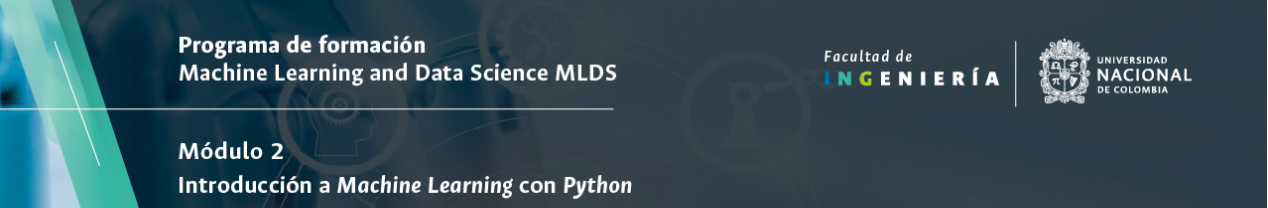

***Universidad Nacional de Colombia***

Autor: Katherine Rodriguez Sanchez

# **Proyecto Módulo 2: *Introducción a Machine Learning con Python***
---
El presente proyecto se desarrollara usando un conjunto de datos tomado de [*kaggle* - Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification) el cual contiene información de caracteristicas de celulares (ejemplo: RAM, Memoria Interna, etc) y sus precios de venta en categorias, utilizando el lenguaje de programación *Python* y su entorno de herramientas para la computación científica, tomando como referencia la metodología ***CRISP-DM*** para análisis de datos con un alcance previo a la etapa de despliegue.
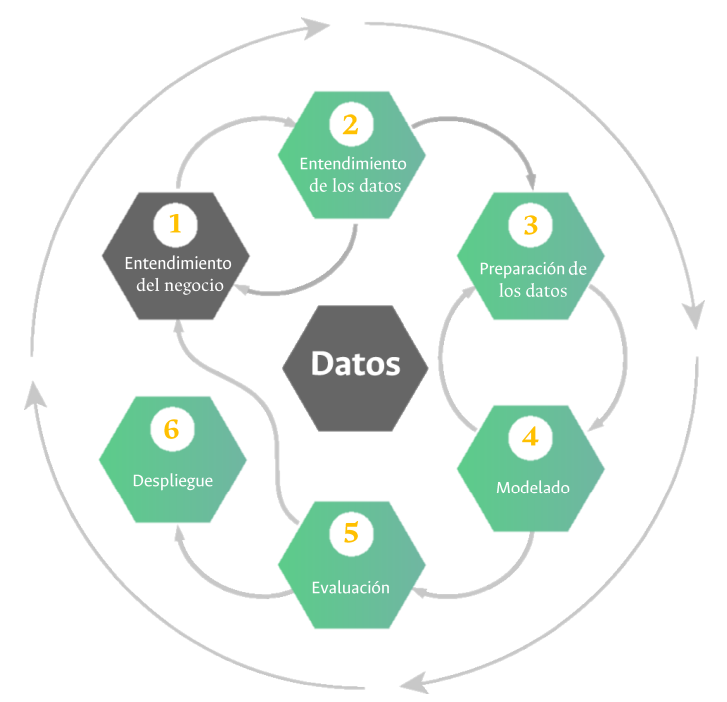

## **1. Entendimiento del negocio**
---

### a. Objetivos de negocio y situación actual

El usuario final a iniciado su propia empresa de producción y venta de celulares, queriendo dar una pelea dura a las grandes empresas como Apple, Samsung, etc. Actualmente no conoce como estimar el precio para los celulares que su empresa produce y no se puede asumir debido al mercado competitivo de celulares, para resolver este problema la empresa recolecto información de ventas de celulares de varias compañías. Para el negocio se requiere:

1. Encontrar algunas relaciones entre las caracteristicas de los celulares (ejemplo: RAM, Memoria Interna, etc) y el precio de venta.
2. No se requiere predecir el precio puntual actual, pero si un rango de precio que indique que tan alto es el precio para determinados grupos de celulares.

### b. Metas del proyecto de Machine Learning

1. Ejecutar, modelar y evaluar un proyecto real de machine learning, por medio del uso de la herramienta del lenguaje de programación *Python* y sus librerias especializadas como *scikit-learn*.

2. Entender e implementar de manera correcta la metodología *CRISP-DM (Cross-Industry Standard Process for Data Mining)* en todas sus etapas previas al despliegue.

3. Implementar modelos de aprendizaje supervisado y no supervisado segun aplique al conjunto de datos, evaluarlos y afinarlos, permitiendo llegar a conclusiones validas de los modelos.

## **2. Entendimiento de los datos**
---

### a. Recolección inicial de datos

Inicialmente para la adquisición de los datos se cuenta con 2 archivos con extensión ***.csv*** los cuales son tomados de [*kaggle* - Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification), el primer archivo *mobile_price_train.csv* contiene la información del conjunto de entrenamiento, y el segundo archivo *mobile_price_test.csv* contiene la información del conjunto de prueba, estos se almacenan en la nube de *Google Drive* para un manejo directo, para esto se vincula *Google Drive* con *Colaboratory*.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Se guardan las rutas de los archivos en una lista:

In [ ]:
files = ['/content/gdrive/MyDrive/Colab Notebooks/Modulo 2: Introducción a Machine Learning con Python/Proyecto/Data/mobile_price_test.csv', '/content/gdrive/MyDrive/Colab Notebooks/Modulo 2: Introducción a Machine Learning con Python/Proyecto/Data/mobile_price_train.csv']
print(files)

['/content/gdrive/MyDrive/Colab Notebooks/Modulo 2: Introducción a Machine Learning con Python/Proyecto/Data/mobile_price_test.csv', '/content/gdrive/MyDrive/Colab Notebooks/Modulo 2: Introducción a Machine Learning con Python/Proyecto/Data/mobile_price_train.csv']


Se importan las librerias a utilizar por el momento:

In [ ]:
import pandas as pd
import numpy as np

Inicialmente el archivo *mobile_price_train.csv* se va a utilizar tanto para el conjunto de entrenamiento y prueba para poder realizar comparaciones en evaluación, este contiene la información de caracteristicas de  celulares y rango de precio de ventas:

In [ ]:
df_mobile_price = pd.read_csv(files[1])
df_mobile_price

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### b. Descripción de los datos

Se inicia con una descripción inicial de los datos usando el atributo *info*, se observa con más detalle las dimensiones del dataset, los valores no nulos y el tipo de datos:

In [ ]:
df_mobile_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Se observa que en el dataset no hay tipos de datos *object*, unicamente *float* (clock_speed y m_dep) e *int* (las demas caracteristicas), se usa el atributo *describe* para realizar un resumen de las estadísticas descriptivas más comunes por columna:

In [ ]:
df_mobile_price.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Observando los valores de minimo y maximo de algunas columnas en 0 y 1, se puede decir que las columnas categoricas son ***blue, dual_sim, four_g, wifi, touch_screen y three_g*** donde cero es el celular no tiene o si esa caracteristica, las demas columnas son numericas.

De la etiqueta objetivo *price_range* se validan los rangos existentes:

In [ ]:
df_mobile_price['price_range'].unique()

array([1, 2, 3, 0])

Los rangos de precios se encuentran en 4 grupos, donde se estima que los precios de venta de los celulares serian:

1. *0 (Precio bajo)*
2. *1 (Precio medio)*
3. *2 (Precio alto)*
4. *3 (Precio muy alto)*

### c. Exploración de los datos

Importamos algunas librerias para visualización de los datos:

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Configuraciones para las librerías y módulos usados.

# Ignoramos las advertencias o warnings.
import warnings
warnings.simplefilter(action='ignore')

# Configuramos el formato por defecto de la 
# librería de visualización Matplotlib.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 105
mpl.rcParams['figure.figsize'] = (9, 7)
sns.set_theme()

Se busca inicialmente si existe alguna correlación entre las caracteristicas del conjunto de datos:

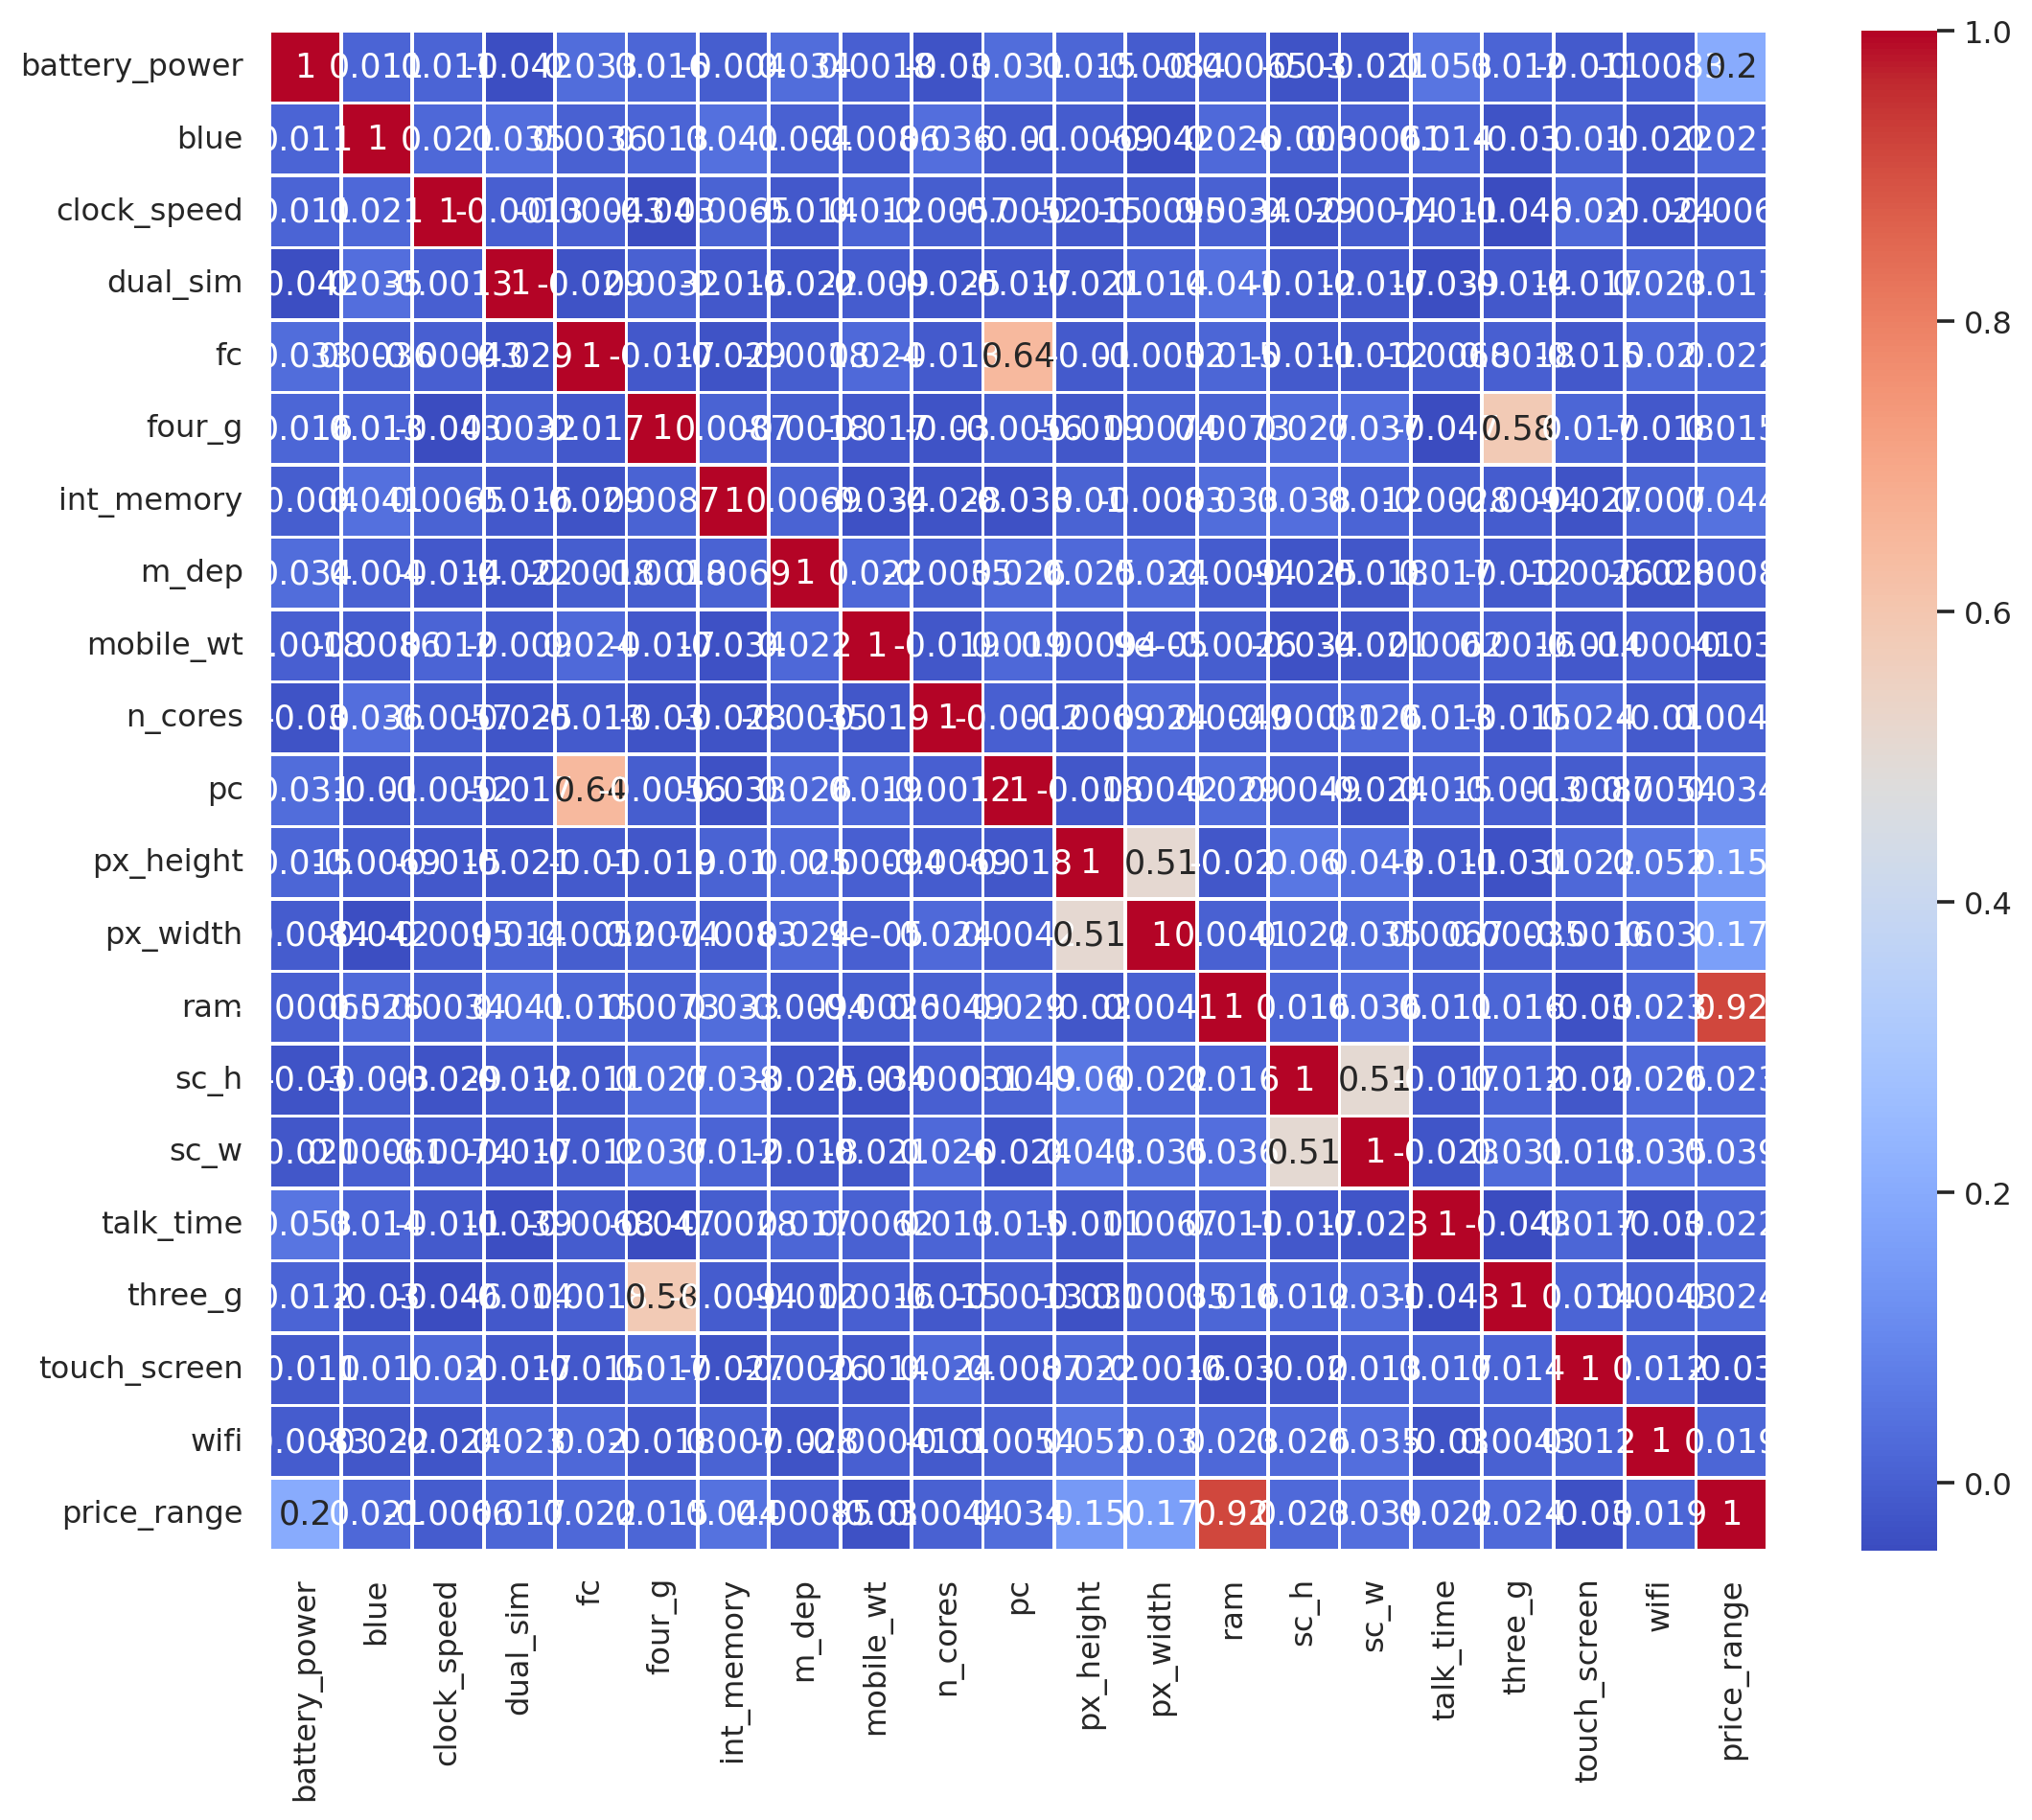

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_mobile_price.corr(), annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

Existe una correlación alta importante entre la caracteristica ***ram*** y el ***price_range***, las demas relaciones evidentes de *three_g* y *four_g*, *sc_h* y *sc_w*, *px_width* y *px_height*, *pc* y *fc* no afectan evidentemente el *price_range* no se tienen en cuenta.

Se valida la distribución de los datos de algunas de las caracteristicas numericas segun el rango del precio:

In [ ]:
col_select = ['price_range', 'ram', 'battery_power', 'clock_speed', 'int_memory', 'n_cores', 'px_height', 'talk_time']
grafica = df_mobile_price[col_select]

In [ ]:
sns.pairplot(grafica,
             hue='price_range',
             palette='rainbow');

Output hidden; open in https://colab.research.google.com to view.

Evidentemente la caracteristica ***ram*** es la que permite visualizar una mejor clasificación de los rangos de precios, evidenciando que un rango *0 (Precio bajo) color morado* son celulares con ram en promedio de 1000, *1 (Precio medio) color azul* son celulares con ram en promedio de 1900, *2 (Precio alto) color amarillo* son celulares con ram en promedio de 2800 y *3 (Precio muy alto) color rojo* son celulares con ram en promedio de 3800.

Se valida el balanceo de las clases de la etiqueta objetivo ***price_range***:

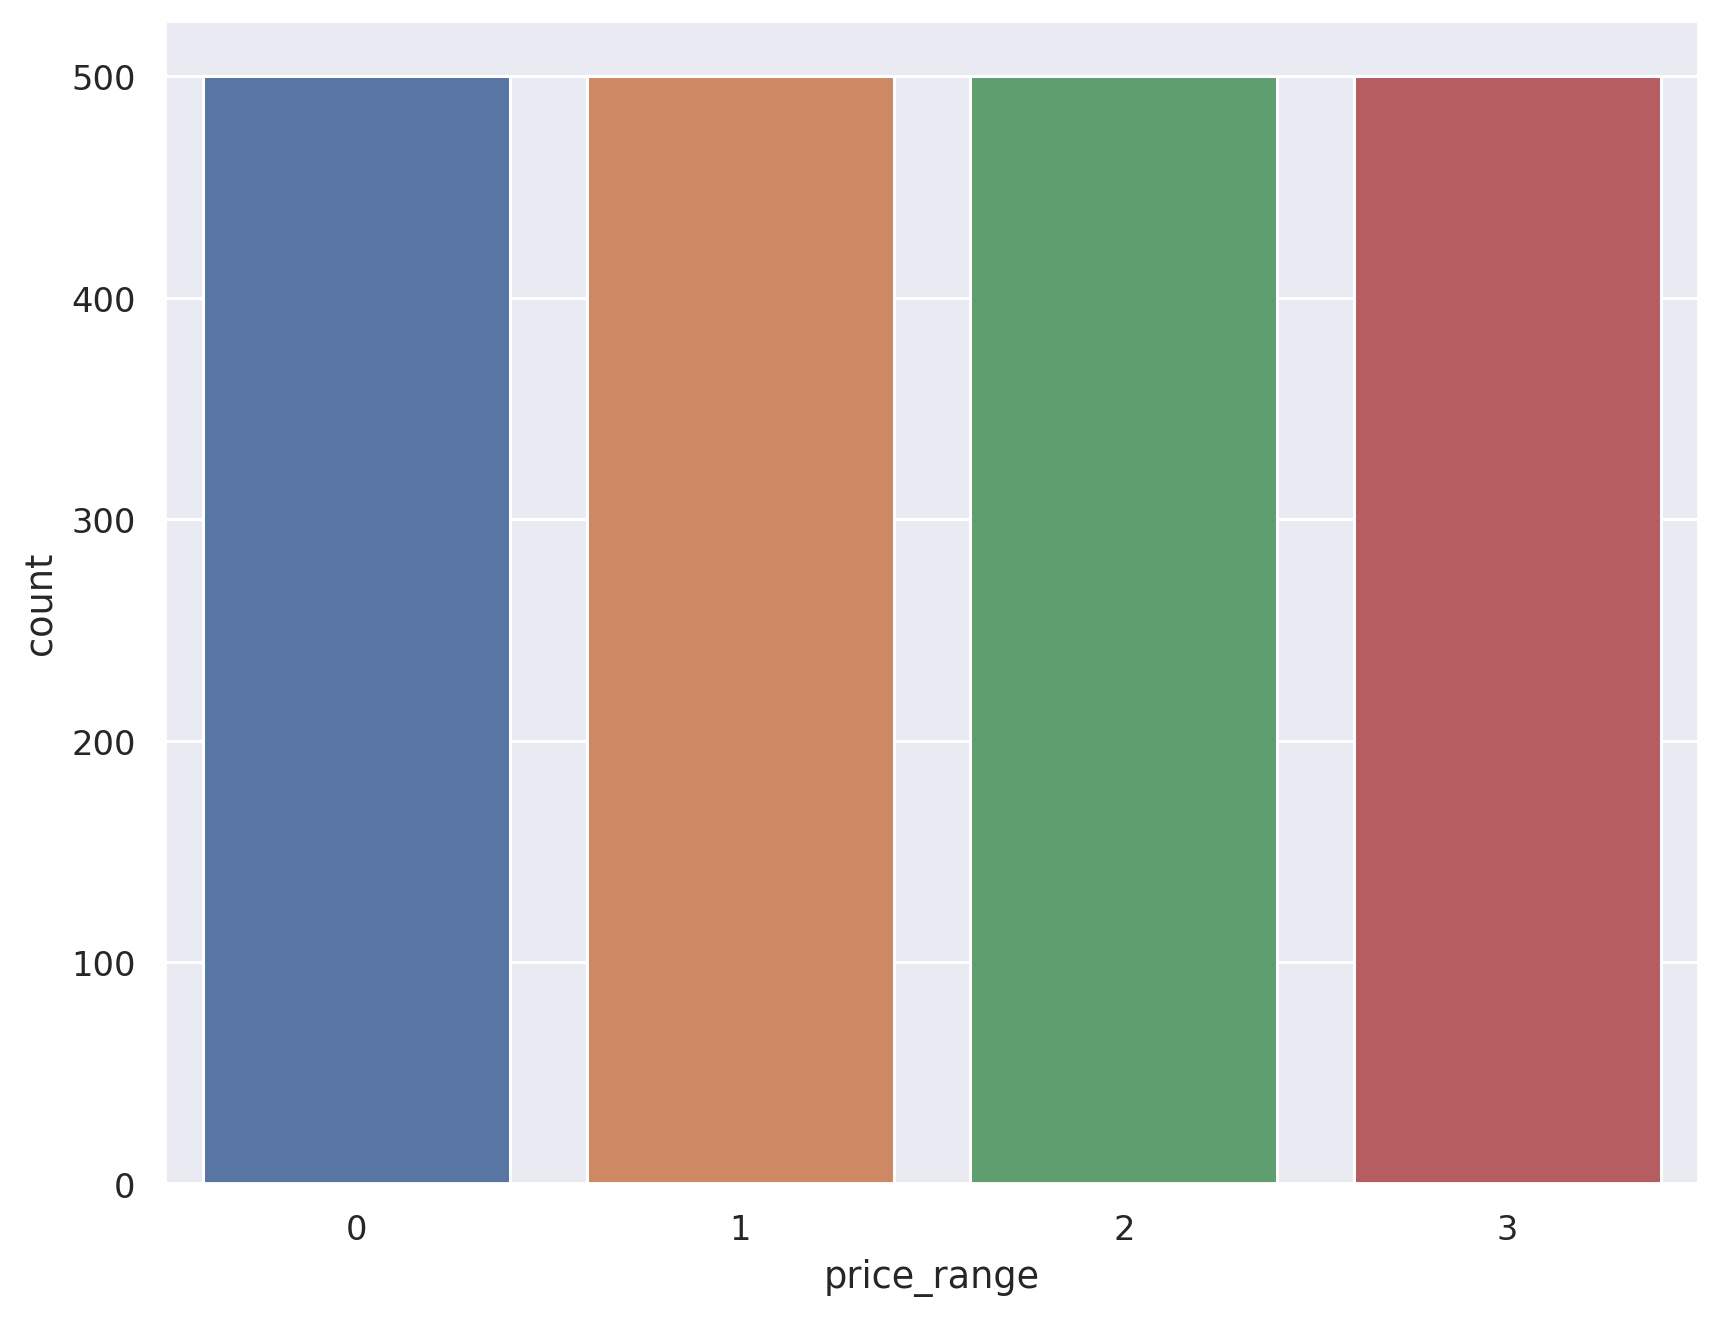

In [ ]:
# Graficamos la distribución de las etiquetas.
plt.figure(dpi = 110)
sns.countplot(df_mobile_price['price_range']);

La distribución de las etiquetas es uniforme en el conjunto de datos, es decir, existe el mismo número (500) de muestras de celulares por rango de precio en el conjunto de datos:

### d. Verificación de la calidad de los datos

Se validan si existen datos nulos en el conjunto de datos: 

In [ ]:
df_mobile_price.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No existen valores nulos en el conjunto de datos, se validan algunas caracteristicas numericas para revisar la existencia de valores atipicos:

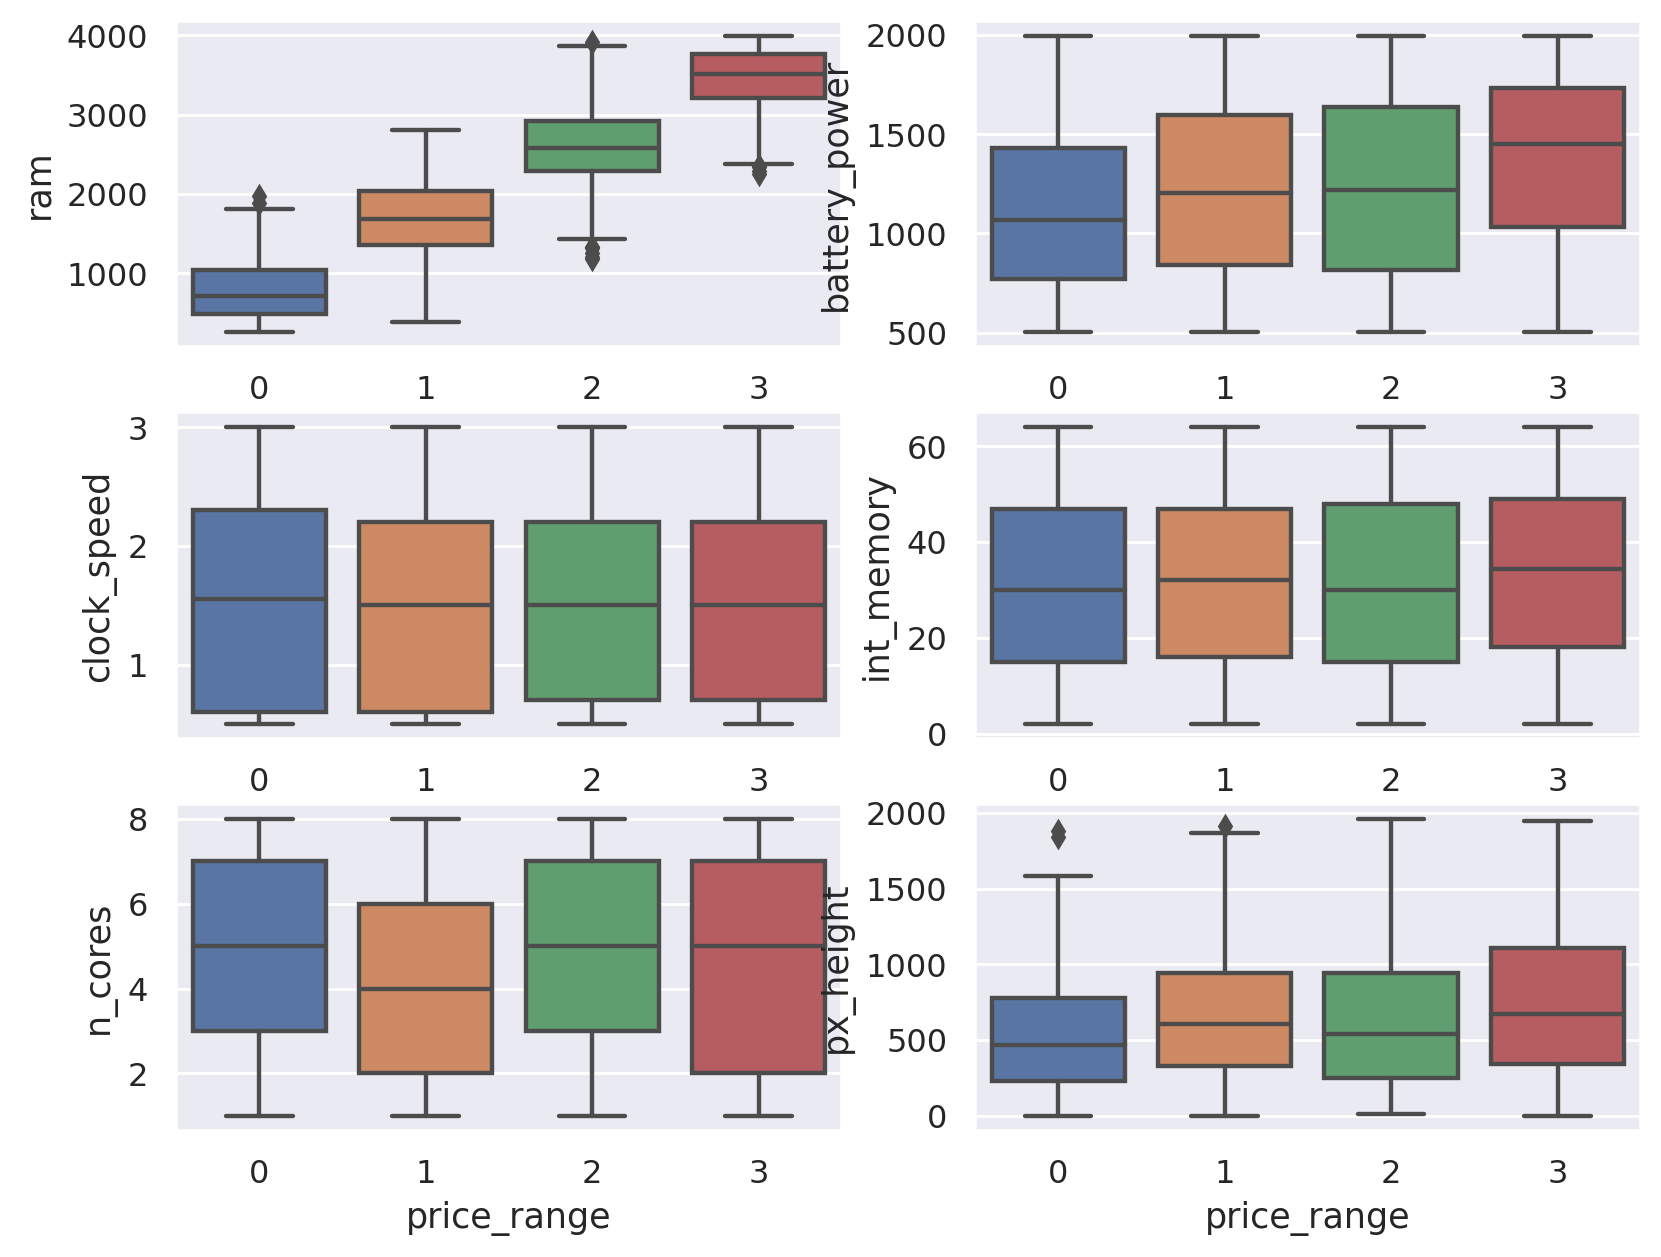

In [ ]:
f, axes = plt.subplots(3, 2)

sns.boxplot( y="ram", x= "price_range", data=df_mobile_price,  orient='v' , ax=axes[0,0])
sns.boxplot( y="battery_power", x= "price_range", data=df_mobile_price,  orient='v' , ax=axes[0,1])
sns.boxplot( y="clock_speed", x= "price_range", data=df_mobile_price,  orient='v' , ax=axes[1,0])
sns.boxplot( y="int_memory", x= "price_range", data=df_mobile_price,  orient='v' , ax=axes[1,1])
sns.boxplot( y="n_cores", x= "price_range", data=df_mobile_price,  orient='v' , ax=axes[2,0])
sns.boxplot( y="px_height", x= "price_range", data=df_mobile_price,  orient='v' , ax=axes[2,1])

Se evidencian valores atipicos en la caracteristica ram, a pesar de esto no se eliminan estos valores atipicos ya que pueden ser casos especiales.

## **3. Preparación de los datos**
---

### a. Selección de datos finales - Preprocesamiento

Para seleccionar los datos finales a usar, se realizara un preprocesamiento, pero antes de empezar convertimos los datos en la forma **`X, y`**.

In [ ]:
X_mobile_price = df_mobile_price.drop(['price_range'], axis=1)
y_mobile_price = df_mobile_price.price_range

print(f'El shape de X_mobile_price es: {X_mobile_price.shape}')
print(f'El shape de y_mobile_price es: {y_mobile_price.shape}')

El shape de X_mobile_price es: (2000, 20)
El shape de y_mobile_price es: (2000,)


Debido a que el conjunto de datos tiene características categóricas que ya estan transformadas numericamente, solo se utilizara la trasnformación **`StandardScaler`** (para las características numéricas).
Con el fin de simplificar el código usaremos **`ColumnTransformer`**. El objeto **`ColumnTransformer`** es una utilidad que permite aplicar distintas transformaciones a distintas columnas de un *DataFrame* de *Pandas*.

Importamos las clases que necesitamos:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Definimos una lista con los nombres de las características numéricas a transformar:

In [ ]:
numeric = X_mobile_price.select_dtypes(['int64', 'float64']).columns.tolist()

Definimos el **`ColumnTransformer`**, con una sola transformación en este caso:
- **`scaler`**: Estandarización para las características numéricas.

En este caso **`scaler`** estandariza las variables numéricas, para que las características tengan baja varianza y asegurarse de que cada característica influye de una manera similar.

In [ ]:
tf = ColumnTransformer([('scaler', StandardScaler(), numeric)])

Aplicamos las transformaciones a el conjunto de datos:

In [ ]:
X_preprocessed_mobile_price = tf.fit_transform(X_mobile_price)

print(f'El shape de X_mobile_price es: {X_mobile_price.shape}')
print(f'El shape de X_preprocessed_mobile_price es: {X_preprocessed_mobile_price.shape}')

El shape de X_mobile_price es: (2000, 20)
El shape de X_preprocessed_mobile_price es: (2000, 20)


Validamos la estandarización de las variables numéricas (en el orden de la lista **`numeric`**):

In [ ]:
X_mobile_price.loc[:5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0


In [ ]:
X_preprocessed_mobile_price[:5]

array([[-0.90259726, -0.9900495 ,  0.83077942, -1.01918398, -0.76249466,
        -1.04396559, -1.38064353,  0.34073951,  1.34924881, -1.10197128,
        -1.3057501 , -1.40894856, -1.14678403,  0.39170341, -0.78498329,
         0.2831028 ,  1.46249332, -1.78686097, -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 ,  0.98117712, -0.99289039,
         0.95788598,  1.15502422,  0.68754816, -0.12005944, -0.66476784,
        -0.64598879,  0.58577791,  1.70446468,  0.46731702,  1.11426556,
        -0.63531667, -0.73426721,  0.55964063,  0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 ,  0.98117712, -0.53209893,
         0.95788598,  0.49354568,  1.38116548,  0.13424391,  0.20963905,
        -0.64598879,  1.39268422,  1.07496821,  0.44149774, -0.31017108,
        -0.86492153, -0.36814045,  0.55964063,  0.99401789, -1.01409939],
       [-1.41931861,  1.0100505 ,  1.19851653, -1.01918398, -0.99289039,
        -1.04396559, -1.2152739 ,  1.03435682, -

## **4. Modelamiento**
---

### a. Selección de un modelo apropiado para el problema (supervisado/no supervisado) / Diseño de la experimentación / Construcción y entrenamiento de los modelos

Debido a fines educativos en el presente proyecto, se aplicaran modelos tanto de aprendizaje supervisado como no supervisado para validar ambas respuestas de los modelos y llegar a conclusiones amplias, con lo cual se compararan los siguientes modelos:

1. Aprendizaje supervisado:
**Clasificación**
- Regresión logistica
- K-NN: Vecinos mas cercanos
- Árboles de decisión
- Máquinas de vectores de soporte (SVM)
- Redes Neuronales

2. Aprendizaje no supervisado:
**Clustering particional**
- K-means

Inicialmente dividimos el conjunto de datos en dos particiones de entrenamiento y prueba, debemos tener en cuenta que se conserve la distribución de las etiquetas de los datos tanto en entrenamiento como en prueba (estratificación), para esto utilizamos el conjunto de datos ya preprocesado:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_mobile_price, 
                                                    y_mobile_price,
                                                    test_size=0.3,
                                                    stratify=y_mobile_price,
                                                    random_state=42)

El argumento **`stratify`** le indica a *Scikit-learn* que se desea estratificar los datos con respecto a **`y`**.

Vamos a verificar el número de muestras de ambas particiones y la distribución de clases de cada una.

In [ ]:
print(f'Número de muestras en entrenamiento: {X_train.shape[0]}')
print(f'Número de muestras en prueba: {X_test.shape[0]}')
print(f'Número de características: {X_train.shape[1]}')

# La función np.bincount permite realizar el conteo 
# de ocurrencia de valores enteros en un arreglo.

print(f'Distribución de clases en entrenamiento: {np.bincount(y_train)}')
print(f'Distribución de clases en prueba: {np.bincount(y_test)}')

Número de muestras en entrenamiento: 1400
Número de muestras en prueba: 600
Número de características: 20
Distribución de clases en entrenamiento: [350 350 350 350]
Distribución de clases en prueba: [150 150 150 150]


Se procede a crear funciones de utilidad y visualización de los datos:

In [ ]:
# Función para visualizar la curva de aprendizaje a partir 
# del error de entrenamiento y de generalización K-NN.
def plot_learning_curve_knn(train_error, generalization_error):
  
  balance_point = np.array(generalization_error).argmin() + 1
  plt.figure(figsize = (8, 5), dpi = 105)

  plt.plot(range(1, k_values + 1), train_error, label="Entrenamiento")
  plt.plot(range(1, k_values + 1), generalization_error, label="Validación")
  plt.xticks(range(0, k_values + 1, 5))
  plt.xlabel("k-vecinos")
  plt.ylabel("Error")
  y_min, y_max = plt.gca().get_ylim() 
  plt.vlines(balance_point, y_min, y_max, colors = ['red'], linestyles = ['dashdot'])
  plt.ylim([y_min, y_max])
  plt.text(balance_point + 1, 0.165, f'Punto de balance: {balance_point}')
  plt.legend();

In [ ]:
# Función para visualizar la curva de aprendizaje a partir 
# del error de entrenamiento y de generalización DecisionTreeClassifier.
def plot_learning_curve_DecisionTree(train_error, generalization_error):
  n = len(train_error)
  if len(train_error) != len(generalization_error):
    print("Las secuencias de error de entrenamiento y generalización deben tener el mismo tamaño.")
    return

  balance_point = np.array(generalization_error).argmin() + 1
  plt.figure(figsize = (8, 5), dpi = 105)

  plt.plot(range(1, n + 1), train_error, label="Entrenamiento")
  plt.plot(range(1, n + 1), generalization_error, label="Generalización")
  plt.xticks(range(0, n + 1, 2))
  plt.xlabel("Profundidad máxima")
  plt.ylabel("Error")
  y_min, y_max = plt.gca().get_ylim() 
  plt.vlines(balance_point, y_min, y_max, colors = ['red'], linestyles = ['dashdot'])
  plt.ylim([y_min, y_max])
  plt.text(balance_point + 1, 0.165, f'Punto de balance: {balance_point}')
  plt.legend();

In [ ]:
# Gracicar la curva de aprendizaje de determinada métrica de agrupamiento.

def plot_metric(K, scores, metric_name):
  plt.figure(dpi=110, figsize=(9, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

Se proceden a entrenar los modelos de clasificación:

#### a.1. Aprendizaje supervisado - Clasificación

##### a.1.1. Regresión logistica

Primero entrenaremos una regresión logística utilizando únicamente las variables numéricas.

Importamos el paquete **`linear_model`** que incluye la clase **`LogisticRegression`**.

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

Calcularemos la exactitud y el error de cada clasificador entrenado en la partición de entrenamiento y prueba.
En *scikit-learn* la **exactitud** se puede calcular mediante la función **`accuracy_score`** del paquete **`metrics`**.

In [ ]:
from sklearn.metrics import accuracy_score

Veamos las métricas sobre la partición de entrenamiento:

In [ ]:
# Obtenemos la predicción del clasificador.
y_pred = lreg.predict(X_train)

# Calculamos la exactitud de la predicción.
acc = accuracy_score(y_train, y_pred)

print(f'Exactitud en entrenamiento {acc}')
print(f'Error en entrenamiento: {1.0 - acc}')

Exactitud en entrenamiento 0.9764285714285714
Error en entrenamiento: 0.023571428571428577


Veamos las métricas sobre la partición de pruebas:

In [ ]:
# Obtenemos la predicción del clasificador usando variables numéricas.
y_pred = lreg.predict(X_test)

# Calculamos la exactitud de la predicción.
acc = accuracy_score(y_test, y_pred)

print(f'Exactitud en prueba {acc}')
print(f'Error en prueba: {1.0 - acc}')

Exactitud en prueba 0.96
Error en prueba: 0.040000000000000036


Se evidencia que la regresión logistica tiene exactitud en prueba de ***0.96***, con lo cual se eligen estos valores de hiperparametros por defecto.

In [ ]:
lreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Encontramos algunos hiperparámetros como:

* **`fit_intercept`**: especifica si el modelo utiliza el intercepto $w_0$.
* **`class_weight`** permite ponderar cada clase de acuerdo a un peso determinado.
* **`penalty`**: función de pérdida usada para la regularización del modelo. Es una restricción que se agrega sobre la función de pérdida que permite optimizar el modelo de regresión logística.
* **`tol`**: tolerancia mínima en la función de pérdida para detener el entrenamiento.
* **`solver`**: algoritmo de optimización que se utilizará para el entrenamiento.

##### a.1.2. K-NN

Para este modelo se va a evaluar la complejidad del modelo, analizando el error de entrenamiento y generalización, en el caso de **`KNearestNeighbor`**, la complejidad está determinada por el número de vecinos $k$. **Entre menor sea el número de vecinos, más complejo es el modelo.**

A continuación, se exploran un conjunto de valores $k$, con el objetivo de encontrar aquél modelo con el mejor compromiso entre error de entrenamiento y error de generalización.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = 300

train_error = []
generalization_error = []

for nn in range(1, k_values + 1):
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train, y_train)
    train_error.append(1 - knn.score(X_train, y_train))
    generalization_error.append(1 - knn.score(X_test, y_test))

Visualizamos ambas curvas de aprendizaje:

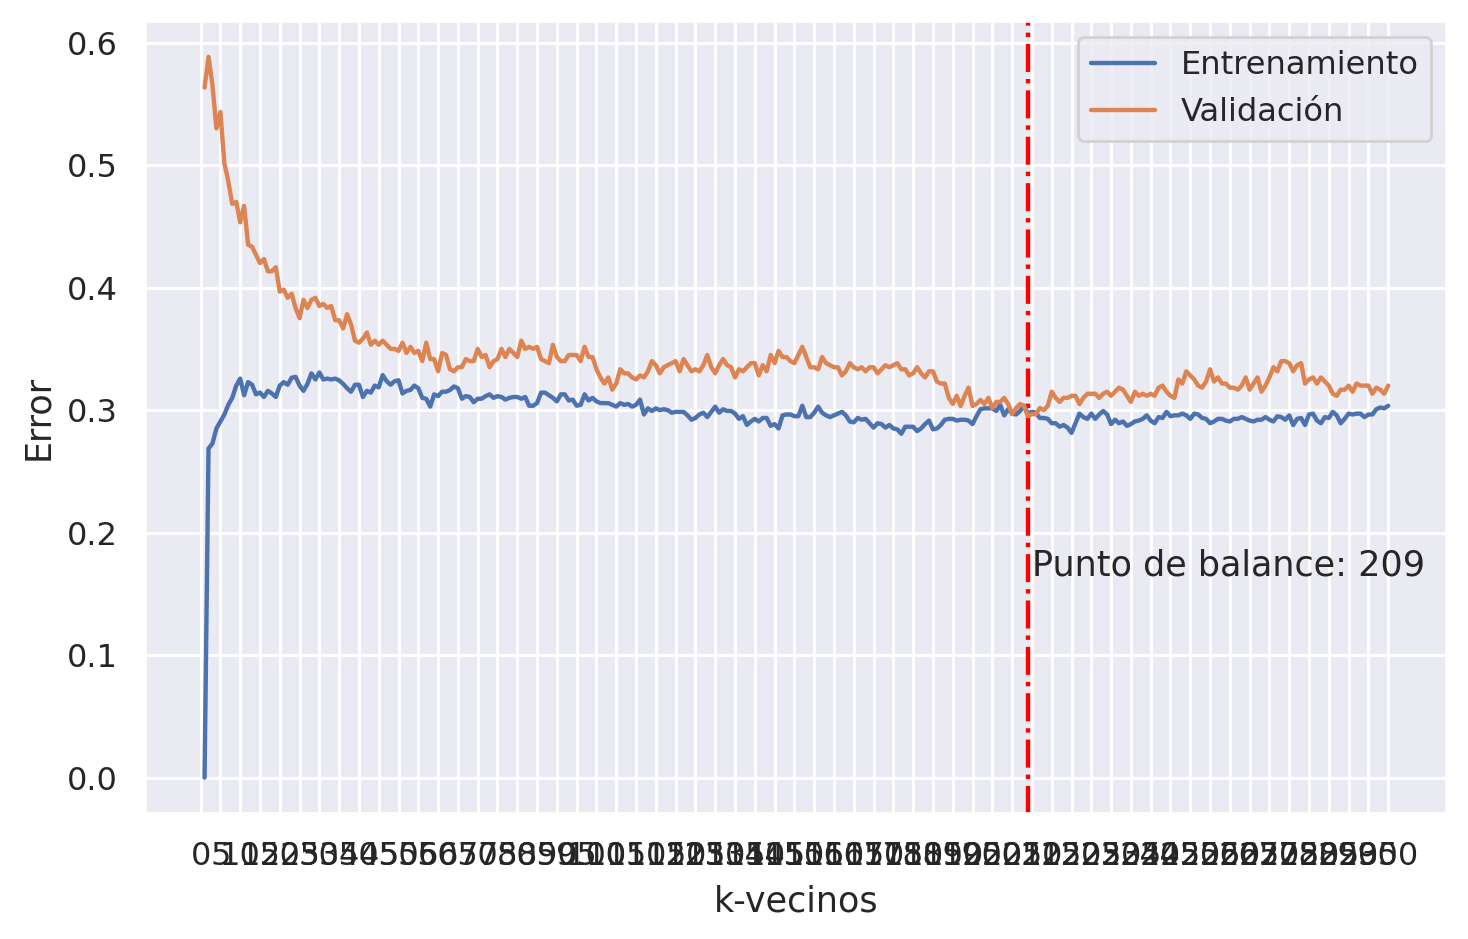

In [ ]:
plot_learning_curve_knn(train_error, generalization_error)

Se observa que el error de entrenamiento es más alto para modelos más simples (valor de $k$ alto) y tiende a cero para modelos más complejos (valor bajo de $k$). Además, el error de validación es alto en ambos extremos, y tiene su punto de balance mínimo en $k=209$.

In [ ]:
print("Error de entrenamiento con k = 209:", train_error[208])

Error de entrenamiento con k = 209: 0.29714285714285715


In [ ]:
print("Accuracy de entrenamiento con k = 209:", 1 - train_error[208])

Accuracy de entrenamiento con k = 209: 0.7028571428571428


In [ ]:
print("Error de generalización con k = 209:", generalization_error[208])

Error de generalización con k = 209: 0.29500000000000004


In [ ]:
print("Accuracy de generalización con k = 209:", 1 - generalization_error[208])

Accuracy de generalización con k = 209: 0.705


Adicional se realiza una prueba de validación cruzada con gridSearch para validar si se logra encontrar otro valor mas optimo para el hiperparametro $k$, definimos los siguientes valores para $k$:

In [ ]:
param_grid_knn = {'n_neighbors':     [i for i in range(1, 250, 5)]}

In [ ]:
# Búsqueda en cuadrícula de hiperparámetros.
from sklearn.model_selection import GridSearchCV 

grid_clf_knn = GridSearchCV(KNeighborsClassifier(), 
                   param_grid=param_grid_knn, 
                   verbose=1, 
                   cv=10,
                   return_train_score=False
                   )

grid_clf_knn.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 126, 131, 136,
                                         141, 146, ...]},
             verbose=1)

**`GridSearchCV`** nos ofrece una serie de atributos y métodos que nos permiten consultar:

* La configuración con el mejor desempeño (**`best_params_`**).
* El *accuracy* promedio sobre todos los pliegues de la mejor configuración(**`best_score_`**).

In [ ]:
print(f'Mejores hiperparámetros:\n {grid_clf_knn.best_params_}')
print(f'Mejor exactitud (validación): {grid_clf_knn.best_score_}')

Mejores hiperparámetros:
 {'n_neighbors': 211}
Mejor exactitud (validación): 0.687857142857143


Una vez se haya entrenado el modelo usando validación cruzada, **`GridSearchCV`** escoge automáticamente la mejor configuración y vuelve a entrenar un modelo sobre todo el conjunto de datos de entrenamiento. Por lo tanto tras realizar el entrenamiento con **`fit`** se pueden hacer llamados a funciones como **`predict()`** y **`score()`** directamente desde el objeto de *grid search*.

Para reportar sobre el conjunto de prueba basta con ejecutar:

In [ ]:
print(f'Mejor exactitud (prueba): {grid_clf_knn.score(X_test, y_test)}')

Mejor exactitud (prueba): 0.7033333333333334


Se evidencia que el valor $k$ hallado inicialmente de *209* tiene mejor exactitud en prueba ***0.705***, con lo cual se elige este valor para este modelo.

##### a.1.3. Árboles de decisión

La implementación de *Scikit-Learn* se consigue con la clase **`DecisionTreeClassifier`** del módulo **`sklearn.tree`**.

Algunos de los parámetros más importantes del clasificador **`DecisionTreeClassifier`** son:
* **`max_depth`**: profundidad máxima del árbol.
* **`criterion`**: medida para determinar la calidad del particionamiento generado por un atributo. Soporta el coeficiente de *Gini* y entropía.
* **`min_samples_split`**: controla el número mínimo de muestras que debe haber en un nodo luego de una partición.
* **`min_samples_leaf`**: controla el número mínimo de muestras que debe haber en un nodo hoja.

In [ ]:
# Importamos el constructor del clasificador por árboles de decisión.
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

Validamos el error de entrenamiento:

In [ ]:
print(f'Error de entrenamiento: {1 - tree.score(X_train, y_train)}')

Error de entrenamiento: 0.0


El conjunto de datos tiene un error con valor $0$, que apunta a un posible **sobreajuste**.

Vamos a evaluar nuevamente la complejidad del modelo, analizando el error de entrenamiento y generalización, en el caso de **`DecisionTreeClassifier`**, para evaluar la complejidad existen varios parametros importantes, en este caso vamos a estimar este valor tomando como referencia la profundidad del árbol.

In [ ]:
#Ejemplo varios parametros de DecisionTreeClassifier
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Vamos a explorar los siguientes valores de profundidad máxima:
* $[1, 2, 3, \dots, 20]$

In [ ]:
# Números enteros de 1 a 20 como posibles valores del hiperparámetro de profundidad.
max_depth_values = np.arange(1, 21, 1)

# Arreglos vacíos para almacenar el error de entrenamiento y el de generalización.
train_error2 = np.empty(len(max_depth_values))
generalization_error2 = np.empty(len(max_depth_values))


for depth in max_depth_values:
    # Entrenamos un árbol de decisión para cada valor de profundidad.
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train, y_train)

    # Almacenamos el error de entrenamiento y de generalización por cada árbol.
    train_error2[depth - 1] = (1 - decision_tree.score(X_train, y_train))
    generalization_error2[depth - 1] = (1 - decision_tree.score(X_test, y_test))

Visualizamos la curva de error de entrenamiento contra error de generalización:

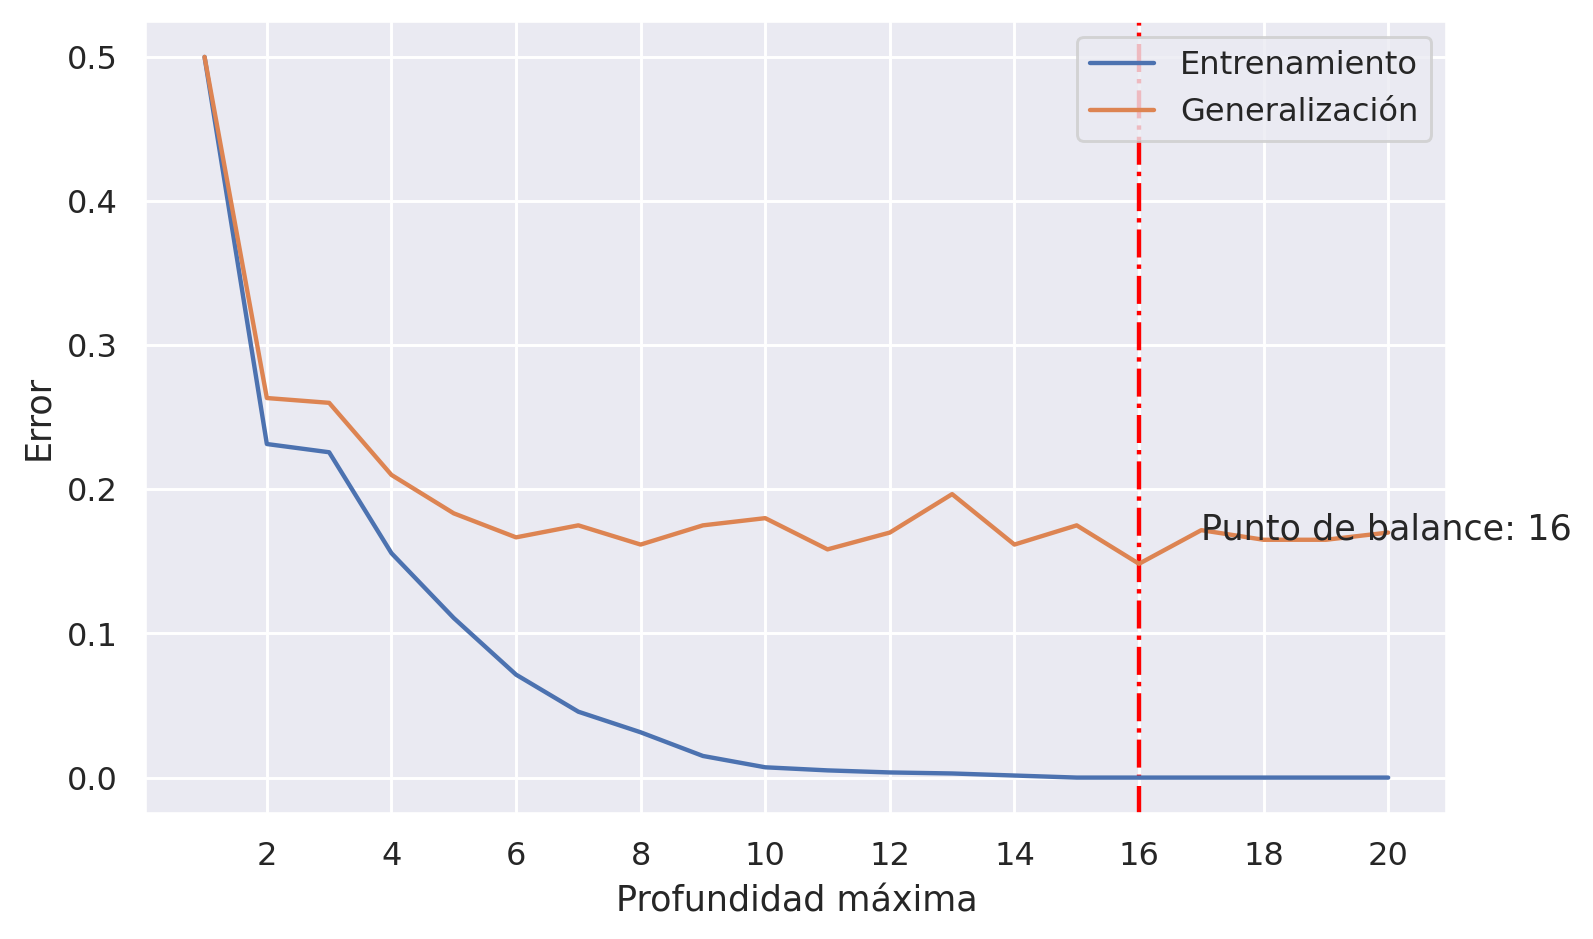

In [ ]:
plot_learning_curve_DecisionTree(train_error2, generalization_error2)

En este caso, el balance entre ambos errores se alcanza con profundidad de $16$ nodos.

In [ ]:
print("Error de generalización con max_depth_values = 16:", generalization_error2[15])

Error de generalización con max_depth_values = 16: 0.14833333333333332


In [ ]:
print("Accuracy de generalización con max_depth_values = 16:", 1 - generalization_error2[15])

Accuracy de generalización con max_depth_values = 16: 0.8516666666666667


Adicional se realiza una prueba de validación cruzada con gridSearch para validar si se logra encontrar otro valor mas optimo de accuracy en pruebas, para varios hiperparametros del clasificador **`DecisionTreeClassifier`**, definimos los siguientes valores para los hiperparametros:

In [ ]:
param_grid_tree = {
    "max_depth": range(5, 60, 5),     # Profundidad máxima del árbol de decisión.
    "criterion": ["gini", "entropy"], # Criterio de partición del árbol.
  }

In [ ]:
# Búsqueda en cuadrícula de hiperparámetros.
from sklearn.model_selection import GridSearchCV 

grid_clf_tree = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid=param_grid_tree, 
                   verbose=1, 
                   cv=10,
                   return_train_score=False
                   )

grid_clf_tree.fit(X_train, y_train)

Fitting 10 folds for each of 22 candidates, totalling 220 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 60, 5)},
             verbose=1)

Validamos:

* La configuración con el mejor desempeño (**`best_params_`**).
* El *accuracy* promedio sobre todos los pliegues de la mejor configuración(**`best_score_`**).

In [ ]:
print(f'Mejores hiperparámetros:\n {grid_clf_tree.best_params_}')
print(f'Mejor exactitud (validación): {grid_clf_tree.best_score_}')

Mejores hiperparámetros:
 {'criterion': 'entropy', 'max_depth': 15}
Mejor exactitud (validación): 0.837142857142857


Exactitud sobre el conjunto de prueba:

In [ ]:
print(f'Mejor exactitud (prueba): {grid_clf_tree.score(X_test, y_test)}')

Mejor exactitud (prueba): 0.865


Se evidencia que el valor *max_depth* y *criterion* hallado con gridSearch tienen mejor exactitud en prueba con ***0.86***, con lo cual se eligen estos valores para los hiperparametros de este modelo.

##### a.1.4. Máquinas de vectores de soporte (SVM)
Para este modelo se exploraran con *kernel lineal* y *kernel gaussiano* de la siguiente manera:

***Kernel Lineal***

Esta implementación se consulta a través del modulo y clase **`sklearn.svm.LinearSVC`**.

In [ ]:
# Modelo de máquina de vector de soporte con kernel lineal.
from sklearn.svm import LinearSVC

# Declaramos el modelo SVC lineal para el conjunto de datos.
svm_kernel_lineal = LinearSVC(max_iter=5000)
# Entrenamos el modelo con sus datos de entrada respectivos.
svm_kernel_lineal.fit(X_train, y_train);

El error y accuracy en el conjunto de entrenamiento y prueba es el siguiente:

In [ ]:
print(f"Error en entrenamiento:\t{1-svm_kernel_lineal.score(X_train, y_train):.4f}")
print(f"Error en prueba:\t{1-svm_kernel_lineal.score(X_test, y_test):.4f}")
print(f"Accuracy en entrenamiento:\t{svm_kernel_lineal.score(X_train, y_train):.4f}")
print(f"Accuracy en prueba:\t{svm_kernel_lineal.score(X_test, y_test):.4f}")

Error en entrenamiento:	0.1193
Error en prueba:	0.1700
Accuracy en entrenamiento:	0.8807
Accuracy en prueba:	0.8300


Hasta el momento, los resultados son muy similares a los que obtuvimos con el método de clasificación lineal **`LogisticRegression`**.

***Kernel Gaussiano***

Para implementar un clasificador de vectores de soporte con un *kernel* gaussiano podemos utilizar el constructor de clasificadores basados en máquinas de soporte general **`sklearn.SVC`**. Esta es una versión general de este tipo de clasificador, que acepta distintos argumentos para definir el método deseado.
En la literatura este método también se encuentra como *kernel* usando una función de base radial (**RBF** por del ingles *Radial basis function*).

Para este modelo se va a evaluar la complejidad del modelo con ayuda de gridSearch, los modelos *SVM* que usan *RBF* comúnmente requieren el ajuste de los parámetros **`gamma`** (coeficiente $\gamma$ del *kernel*) y **`C`** (parámetro de regularización, ambos parámetros controlan la complejidad del modelo.

Definimos los siguientes valores para $C$ y $\textit{gamma}$. Vamos a explorar estos valores en el siguiente rango de potencias de 2:

> $2^{-5}, 2^{-4}, \dots , 2^{6}, 2^{7} $

In [ ]:
# Los hiperparámetros deben estar en forma de diccionario.
param_grid_svm_gaussiano = {'C':     [2**i for i in range(-5, 7, 1)], 
              'gamma': [2**i for i in range(-5, 7, 1)]}

param_grid_svm_gaussiano

{'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64],
 'gamma': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]}

In [ ]:
#Clasificador de vectores de soporte general.
from sklearn.svm import SVC
# Búsqueda en cuadrícula de hiperparámetros.
from sklearn.model_selection import GridSearchCV 

grid_clf_svm_gaussiano = GridSearchCV(SVC(kernel='rbf'), 
                   param_grid=param_grid_svm_gaussiano, 
                   verbose=1, 
                   return_train_score=False
                   )

grid_clf_svm_gaussiano.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32, 64],
                         'gamma': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4,
                                   8, 16, 32, 64]},
             verbose=1)

Validamos:

* La configuración con el mejor desempeño (**`best_params_`**).
* El *accuracy* promedio sobre todos los pliegues de la mejor configuración(**`best_score_`**).

In [ ]:
print(f'Mejores hiperparámetros:\n {grid_clf_svm_gaussiano.best_params_}')
print(f'Mejor exactitud (validación): {grid_clf_svm_gaussiano.best_score_}')

Mejores hiperparámetros:
 {'C': 16, 'gamma': 0.03125}
Mejor exactitud (validación): 0.8707142857142858


Exactitud sobre el conjunto de prueba:

In [ ]:
print(f'Mejor exactitud (prueba): {grid_clf_svm_gaussiano.score(X_test, y_test)}')

Mejor exactitud (prueba): 0.89


Se evidencia que el valor *C: 16* y *gamma: 0.03125* hallado con gridSearch tienen mejor exactitud en prueba con ***0.89***, con lo cual se eligen estos valores para los hiperparametros de este modelo, usando kernel gaussiano y no lineal.

##### a.1.5. Redes Neuronales
El perceptrón multicapa (*Multilayer Perceptron*, MLP en inglés) es un tipo especial de red neuronal artificial en el cual se apilan varias capas de neuronas artificiales o perceptrones. En inglés también se le denomina como ***Feedforward neural network***. 

Una red neuronal multicapa está generalmente conformada por:

* **Capa de entrada:** recibe los datos de entrada.
* **Capa oculta:** cuenta con una o más neuronas.
* **Capa de activación:** aplica una función de activación sobre la salida de cada neurona de la capa oculta.
* **Cada de salida:** produce la predicción para completar la tarea supervisada. Puede ser de clasificación o regresión.

*Scikit-Learn* nos permite trabajar con redes de perceptrones multicapa usando **`sklearn.neural_network.MLPClassifier`**. Una red multicapa se puede entrenar usando **gradiente descendente**, y por tanto, se pueden usar métodos como **gradiente descendente estocástico** (**`sgd`**) u otros métodos de optimización.

El valor del gradiente determina qué tanto debo modificar los pesos de la red o parámetros entrenables para resolver la tarea de predicción. 


**`MLPClassifier`** permite definir esta arquitectura de la siguiente manera:

* **Capa de entrada**: El tamaño de la capa de entrada es definido cuando se llama a la función **`fit()`**. El tamaño está definido por el número de características (o columnas) de la matriz de características `X`.
* **Capa(s) ocultas**: El número de capas ocultas y el tamaño de cada una es definido por el parámetro **`hidden_layer_size`** de la clase **`MLPClassifier`**. Este parámetro consiste en una tupla de $n$ elementos, donde $n$ es igual al número de capas ocultas. Cada elemento de la tupla determina el número de neuronas de esa capa oculta.
* **Función de activación**: Esta función se define usando el parámetro **`activation`**. Este parámetro puede tomar como valor las cadenas de texto **`logistic`**, **`relu`**, **`tanh`** o **`identity`**.
* **Capa de salida**: Se define cuando se llama a la función **`fit()`**. La capa de salida contiene una única neurona, cuya función de activación se define con base al tipo de tarea de clasificación. Si es una tarea de clasificación binaria usa una función de activación logística. Si la tarea es multiclase se usa una función de activación *SoftMax*.

Adicionalmente **`MLPClassifier`** recibe los siguientes parámetros:

* **`solver`**: Puede ser **`lbfgs`**, **`sgd`** o **`adam`**. El *solver* *lbfgs* es una técnica de optimización muy útil para conjuntos pequeños, mientras que *sgd* y *adam* usan gradiente descendente estocástico y son apropiados para conjuntos de datos grandes.
* **`alpha`**: El parámetro $\alpha$ representa el parámetro de regularización y permite penalizar aquellos pesos $w$ grandes.

Para este modelo se va a evaluar la complejidad del modelo con ayuda de gridSearch y la exploración de varios de los hiperparametros expuestos anteriormente:

In [ ]:
# Los hiperparámetros deben estar en forma de diccionario.
param_grid_neural_network = {    
    "hidden_layer_sizes": [(20,), (40,), (80)], # Tamaño de las capas ocultas. 
    "max_iter": range(100, 1000, 200), # Iteraciones máximas
    "solver": ["lbfgs", "sgd"], # Descenso del gradiente estocástico.
    "activation" : ["relu", "logistic", "tanh", "identity"] # Función de activación.
  }

param_grid_neural_network

{'activation': ['relu', 'logistic', 'tanh', 'identity'],
 'hidden_layer_sizes': [(20,), (40,), 80],
 'max_iter': range(100, 1000, 200),
 'solver': ['lbfgs', 'sgd']}

In [ ]:
# Clasificador basado en una red neuronal multicapa.
from sklearn.neural_network import MLPClassifier

# Búsqueda en cuadrícula de hiperparámetros.
from sklearn.model_selection import GridSearchCV 

grid_clf_neural_network = GridSearchCV(
                    MLPClassifier(solver='lbfgs', # Descenso del gradiente estocástico.
                    learning_rate='constant', # Tipo de tasa de aprendizaje.
                    learning_rate_init=0.001, # Tasa de aprendizaje inicial.
                    activation='relu', # Función de activación. 
                                       # En este caso se usa la función de rectificación 
                                       # lineal uniforme "y = max(0, x)"
                    tol= 1e-4),         # Valor de tolerancia de la optimización.
                    param_grid=param_grid_neural_network, 
                    verbose=1, 
                    return_train_score=False
                   )

grid_clf_neural_network.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(estimator=MLPClassifier(solver='lbfgs'),
             param_grid={'activation': ['relu', 'logistic', 'tanh', 'identity'],
                         'hidden_layer_sizes': [(20,), (40,), 80],
                         'max_iter': range(100, 1000, 200),
                         'solver': ['lbfgs', 'sgd']},
             verbose=1)

Validamos:

* La configuración con el mejor desempeño (**`best_params_`**).
* El *accuracy* promedio sobre todos los pliegues de la mejor configuración(**`best_score_`**).

In [ ]:
print(f'Mejores hiperparámetros:\n {grid_clf_neural_network.best_params_}')
print(f'Mejor exactitud (validación): {grid_clf_neural_network.best_score_}')

Mejores hiperparámetros:
 {'activation': 'identity', 'hidden_layer_sizes': (40,), 'max_iter': 100, 'solver': 'lbfgs'}
Mejor exactitud (validación): 0.9635714285714286


Exactitud sobre el conjunto de prueba:

In [ ]:
print(f'Mejor exactitud (prueba): {grid_clf_neural_network.score(X_test, y_test)}')

Mejor exactitud (prueba): 0.97


Se evidencia que los valores de los hiperparametros *activation: identity*, *hidden_layer_sizes: (40,)*, *max_iter: 100* y *solver: lbfgs* hallado con gridSearch tienen mejor exactitud en prueba con ***0.97***, sin embargo el modelo gridSearch tomo 15 minutos para correr la solución.

#### a.2. Aprendizaje no supervisado - Clustering

##### a.2.1. K-means

Adicionamente a los modelos de clasificación evaluados anteriormente, se quiere validar el **algoritmo *k-means*** (o *k-medias*), que es un método de agrupamiento que supone que los grupos (*clusters*) están representadas por un prototipo o elemento representativo, que corresponde al centroide del conjunto de datos, para validar o descubrir posibles caracteristicas o similaridades en los grupos que no se hallan tenido en cuenta en el capitulo anterior.

Podemos usar el método de *Scikit-Learn* **`sklearn.cluster.KMeans`** para ejecutar este algoritmo en nuestros datos. Puesto que es un modelo no supervisado, la función **`fit`** solo recibe como argumento los datos de entrada, no las etiquetas, con lo cual se le pasara el data set completo preprocesado ***X_preprocessed_mobile_price***. La función **`predict`** asigna *clusters* a los ejemplos, y se usa tanto en los datos de entrenamiento como en ejemplos nuevos.



In [ ]:
# Métodos de agrupamiento - Algoritmo K-means
from sklearn.cluster import KMeans

# Número de clusters que se desea generar.
n = 4    

km = KMeans(n_clusters = n)
km.fit(X_preprocessed_mobile_price)

y = km.predict(X_preprocessed_mobile_price)

Usamos **`pandas`** para contar el número de elementos en cada cluster:

In [ ]:
pd.Series(y).value_counts()

3    633
1    471
2    451
0    445
dtype: int64

Las coordenadas de los centroides se pueden obtener con el atributo **`cluster_centers_`**:

In [ ]:
km.cluster_centers_

array([[-1.17057004e-01, -4.16874777e-02, -1.63074880e-01,
        -7.51933489e-02, -4.59097142e-01,  4.04565205e-01,
         6.94066273e-02,  3.75741851e-02,  1.23941929e-02,
         1.42830435e-01, -3.43907070e-01,  7.98189122e-01,
         7.79010214e-01,  3.42534738e-02,  5.73299737e-01,
         5.85974840e-01, -1.19256535e-01,  5.54367594e-01,
         7.71474561e-02,  2.21976811e-01],
       [-2.58619892e-02,  5.88352136e-02,  7.00606857e-02,
         2.13435556e-02, -3.16852826e-02, -1.04396559e+00,
         2.66953758e-02,  2.78017577e-02, -8.11557040e-03,
         2.77030110e-02, -1.38926331e-02,  4.76011073e-02,
        -6.87811814e-03, -3.04951075e-02, -2.84088414e-02,
        -6.34981766e-02,  7.57202212e-02, -1.78686097e+00,
        -2.93550932e-02, -1.18780219e-02],
       [ 3.80317482e-02,  7.78309426e-03,  7.32898970e-02,
        -7.00104207e-02,  1.24567742e+00,  2.83204294e-01,
        -1.97266726e-01, -5.30017443e-03,  8.40598816e-02,
        -5.21013697e-02,  1.0

Podemos ver los parámetros usados por el modelo con **`.get_params()`**.

In [ ]:
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Sin embargo no conocemos si el número optimo de k clusters realmente es 4, para esto necesitamos usar una medida objetiva de la calidad de un *clustering*. Estas medidas se encuentran definidas en el paquete [**`sklearn.metrics.cluster`**](http://scikit-learn.org/stable/modules/classes.html#clustering-metrics). Algunas medidas son supervisadas y otras no-supervisadas:
*  **Medidas supervisadas**: Utilizan las etiquetas reales de los ejemplos para analizar la correspondencia entre *clusters* y clases.
* **Medidas no-supervisadas**: Calculan medidas basadas en las distancias intra-cluster y/o inter-cluster.

Partiendo del hecho que en el dataset si se cuenta con la etiqueta real de los datos, si se discutirán las medidas no-supervisadas.

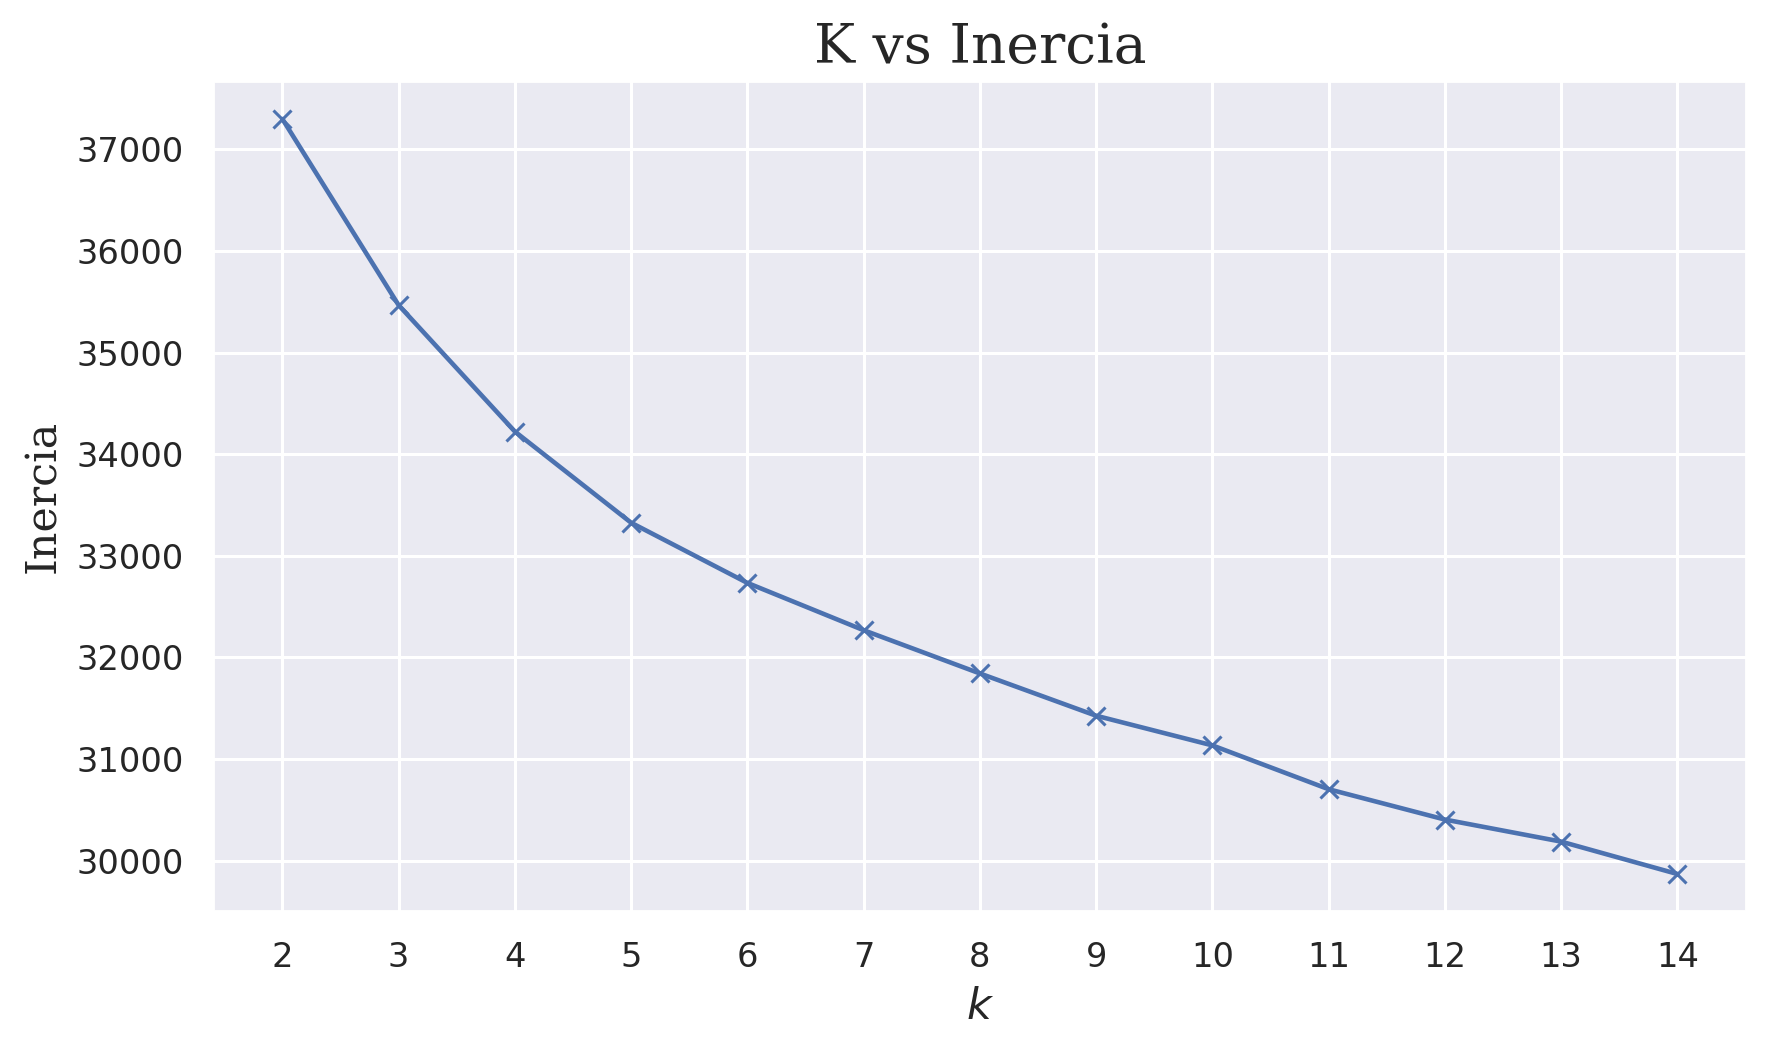

In [ ]:
#Medida no supervisada de inercia
sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_preprocessed_mobile_price)
    sum_of_squared_distances.append(km.inertia_)
    
plot_metric(K, sum_of_squared_distances, 'Inercia')

Con esta grafica de codo de la inercia no es tan evidente cual es el valor optimo del hiperparametro ***k***, continuamos validando con la métrica de *Coeficiente de silueta*:

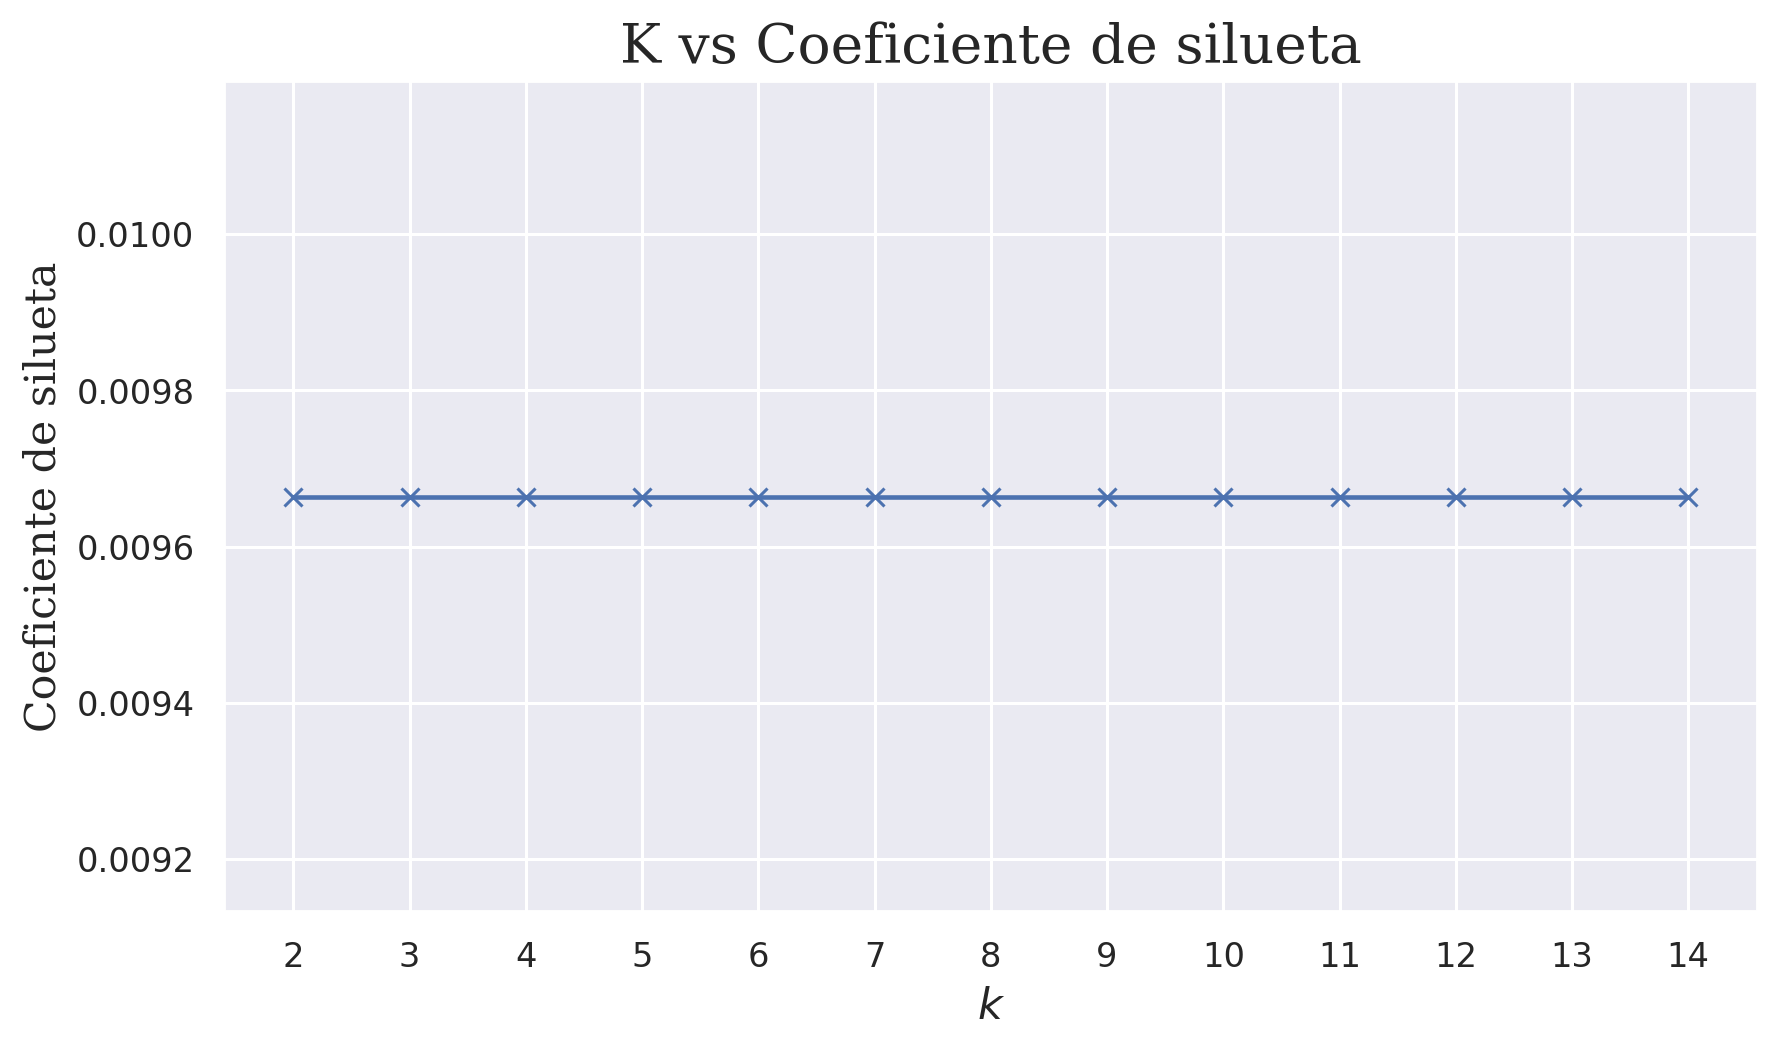

In [ ]:
# Métricas de rendimiento
from sklearn.metrics import silhouette_score

silhouette_scores = []

K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_preprocessed_mobile_price)
    y = km.predict(X_preprocessed_mobile_price)
    silhouette_scores.append(silhouette_score(X_preprocessed_mobile_price, y_mobile_price))

plot_metric(K, silhouette_scores, 'Coeficiente de silueta')

Con estos resultados no se puede llegar a una conclusion de un valor optimo de k.

Se evaluara la medida no supervisada- Indice de Rand, se define la función **`plot_extern_metric`** para graficar una métrica no supervisada para varios valores de $k$. 

In [ ]:
def plot_extern_metric(X, y, metric, metric_name):
  scores = []
  for i in range(2,20):
    model = KMeans(n_clusters=i, random_state=32)
    model.fit(X)
    y_pred = model.predict(X)
    scores.append(metric(y, y_pred))

  plot_metric(range(2, 20), scores, metric_name)  

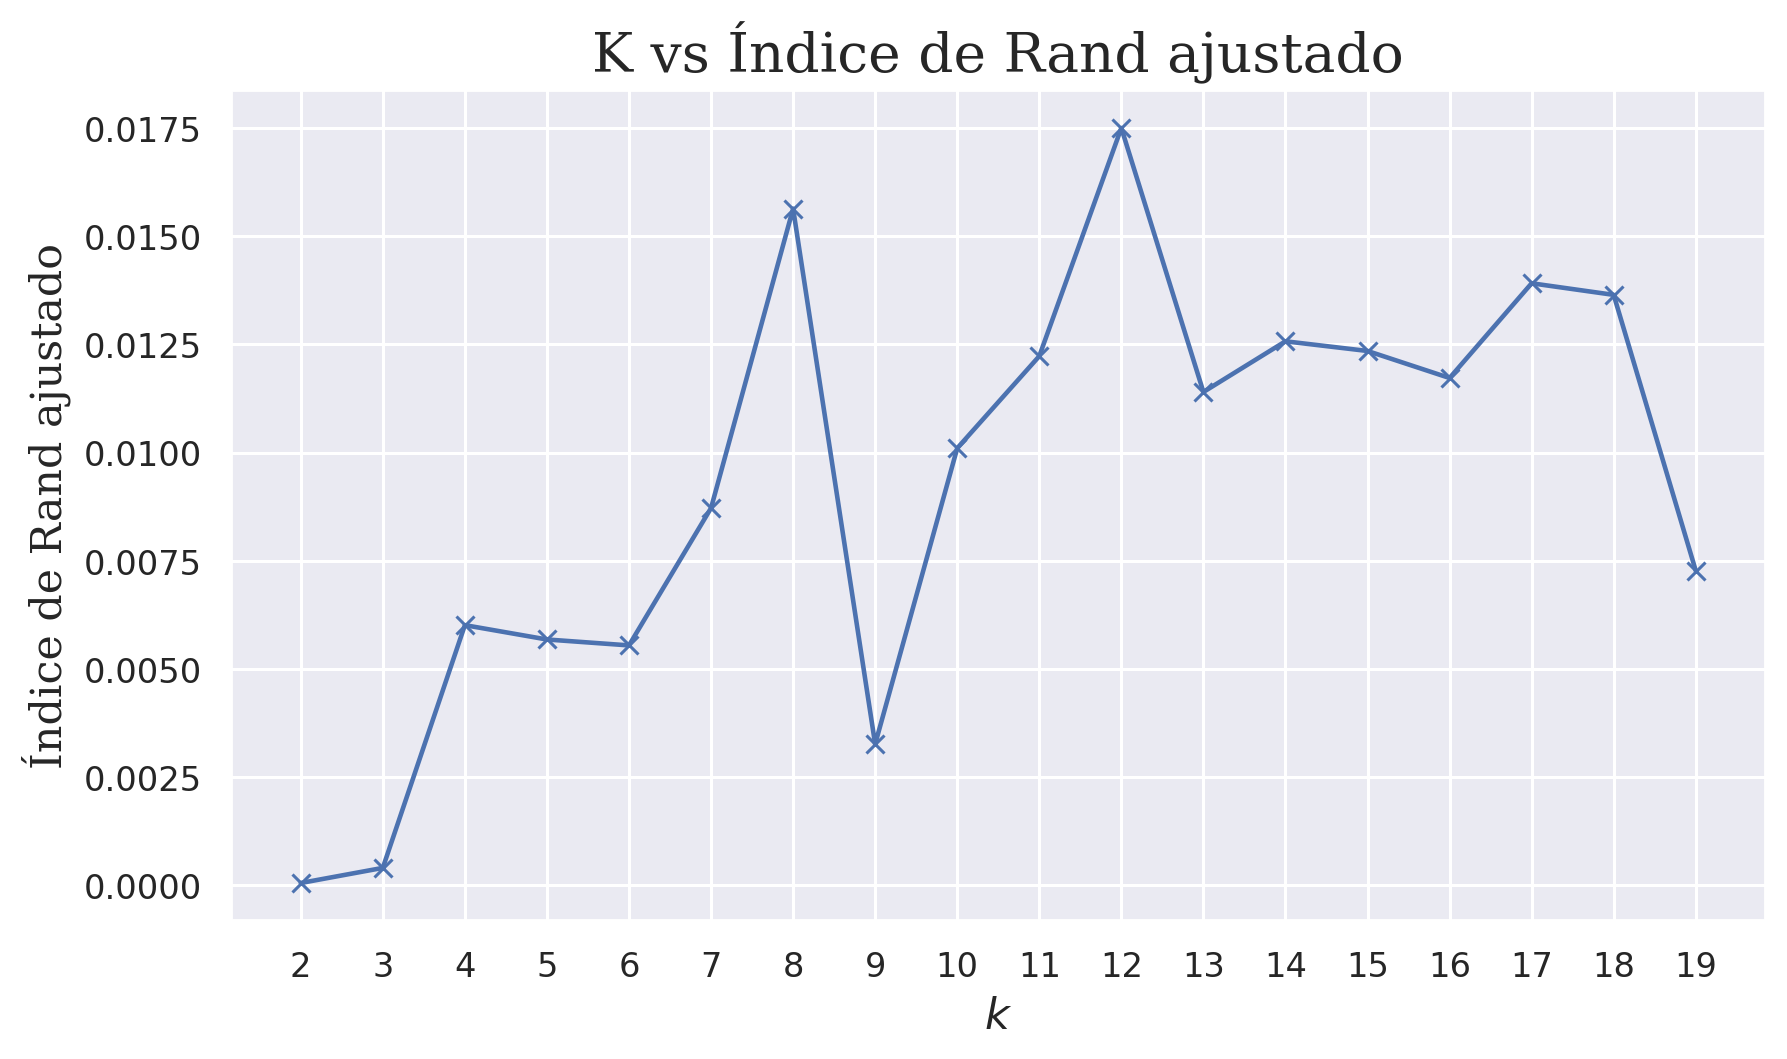

In [ ]:
from sklearn.metrics import adjusted_rand_score

plot_extern_metric(X_preprocessed_mobile_price, y_mobile_price,
            adjusted_rand_score, 'Índice de Rand ajustado')

Podemos ver que el índice de *Rand* es una métrica que buscamos máximizar, en este caso escogeríamos $k=8$ o $k=12$.

Adicional definimos una matriz de contingencia que muestra la relación entre las etiquetas asignadas para cada grupo y las etiquetas reales.

*Scikit-learn* implementa **`contigency_matrix`** en el paquete **`metrics.cluster`**.

Definimos la función **`show_contigency_matrix`** para entrenar un modelo **`KMeans`**, calcular la matriz de contigencia y retornarla como un objeto **`DataFrame`** de *Pandas*, lo que facilita su visualización.

In [ ]:
from sklearn.metrics.cluster import contingency_matrix

def show_contigency_matrix(X, y, n_clusters, classes):
  # Fijamos la semilla aleatoria para obtener resultados reproducibles.
  model = KMeans(n_clusters, random_state=32)
  model.fit(X)
  y_pred = model.predict(X)
  mat = contingency_matrix(y, y_pred)
  columns = ['Cluster ' + str(i) for i in range(n_clusters)]
  
  # Se retorna cómo un DataFrame de Pandas para mejorar la visualización.
  return pd.DataFrame(mat, columns=columns, index=classes)

In [ ]:
show_contigency_matrix(X_preprocessed_mobile_price, y_mobile_price, 8, y_mobile_price.unique())

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
1,113,27,55,62,99,23,81,40
2,74,40,49,77,80,43,67,70
3,44,32,63,87,78,59,74,63
0,27,55,33,73,57,91,61,103


Podemos ver que en general los grupos estan repartidos casi que equitativamente, los valores altos en grupos se encuentran en grupo *0* y *4* corresponden 113 y 99 al rango de precios 1, grupo *5* y *7* corresponden 91 y 103 al rango de precios 0, de los demas grupo no se evidencian cantidades asi mayores.

## **5. Evaluación**
---

### a. Definición de los criterios o métricas de evaluación

Despues de validar en el capitulo anterior principalmente 5 modelos de clasificación de aprendizaje supervisado *(Regresión logistica, K-NN, Árboles de decisión, SVM y Redes Neuronales)* y haber realizado la construccion, modelado y diseño de experimentos, y obtener resultados en base a la evaluación de error y accuracy en entrenamiento y prueba, en este capitulo se realizara una evaluación más profunda no solo de esas dos métricas de evaluación, tambien se evaluaran las metricas de ***Precisión, recall y $F_1$ *score****, al final del capitulo se daran las conclusiones:

In [ ]:
#Función para generar las métricas de desempeño multiclase
from sklearn import metrics

def métrica_multiclase(y_test, y_pred, metric_type, avg_type):
    """
     model: Modelo entrenado
     X_test: arreglo de NumPy de shape (n,m).
     y_test: arreglo de NumPy de shape (n,) con las etiquetas reales.
     metric_type: cadena de texto con el tipo de métrica. Uno de ['f1', 'recall', 'precision'].
     avg_type: cadena de texto con el tipo de promedio realizado. Uno de ['macro', 'micro', 'weighted'].
    Retorna:
     accuracy: Exactitud del modelo.
     error: Error del modelo.
     metric: métrica correspondiente al tipo 'metric_type' y criterio
             de promedio 'avg_type' evaluada entre 'y_pred' y 'y_real'.
    
    """
    ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 3-4 líneas de código) 
    metric_type = getattr(metrics, metric_type + "_score")
    score = metric_type(y_test, y_pred, average=avg_type)

    ### FIN DEL CÓDIGO ###
    return score

Se evalua la función anterior en cada uno de los modelos vistos:

#### a.1. Evaluación - Regresión logistica

Evaluación en entrenamiento:

In [ ]:
from numbers import Number
#Evaluación en entrenamiento
for metric_type in ['f1', 'recall', 'precision']:
  for avg_type in ['macro', 'micro', 'weighted']:
    score = métrica_multiclase(y_train, lreg.predict(X_train), metric_type, avg_type)
    if not isinstance(score, Number):
      print(f"El score {metric_type} {avg_type} no es un número válido.")
    else:
      print("Métrica entrenamiento {}, avg {}: {:.4f}".format(metric_type, avg_type, score))

Métrica entrenamiento f1, avg macro: 0.9764
Métrica entrenamiento f1, avg micro: 0.9764
Métrica entrenamiento f1, avg weighted: 0.9764
Métrica entrenamiento recall, avg macro: 0.9764
Métrica entrenamiento recall, avg micro: 0.9764
Métrica entrenamiento recall, avg weighted: 0.9764
Métrica entrenamiento precision, avg macro: 0.9765
Métrica entrenamiento precision, avg micro: 0.9764
Métrica entrenamiento precision, avg weighted: 0.9765


Evaluación en prueba:

In [ ]:
#Evaluación en prueba
for metric_type in ['f1', 'recall', 'precision']:
  for avg_type in ['macro', 'micro', 'weighted']:
    score = métrica_multiclase(y_test, lreg.predict(X_test), metric_type, avg_type)
    if not isinstance(score, Number):
      print(f"El score {metric_type} {avg_type} no es un número válido.")
    else:
      print("Métrica prueba {}, avg {}: {:.4f}".format(metric_type, avg_type, score))

Métrica prueba f1, avg macro: 0.9600
Métrica prueba f1, avg micro: 0.9600
Métrica prueba f1, avg weighted: 0.9600
Métrica prueba recall, avg macro: 0.9600
Métrica prueba recall, avg micro: 0.9600
Métrica prueba recall, avg weighted: 0.9600
Métrica prueba precision, avg macro: 0.9603
Métrica prueba precision, avg micro: 0.9600
Métrica prueba precision, avg weighted: 0.9603


#### a.2. Evaluación - K-NN

Evaluación en entrenamiento:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = 209
knn = KNeighborsClassifier(n_neighbors=k_values)
knn.fit(X_train, y_train)

#Evaluación en entrenamiento
for metric_type in ['f1', 'recall', 'precision']:
  for avg_type in ['macro', 'micro', 'weighted']:
    score = métrica_multiclase(y_train, knn.predict(X_train), metric_type, avg_type)
    if not isinstance(score, Number):
      print(f"El score {metric_type} {avg_type} no es un número válido.")
    else:
      print("Métrica entrenamiento {}, avg {}: {:.4f}".format(metric_type, avg_type, score))

Métrica entrenamiento f1, avg macro: 0.7034
Métrica entrenamiento f1, avg micro: 0.7029
Métrica entrenamiento f1, avg weighted: 0.7034
Métrica entrenamiento recall, avg macro: 0.7029
Métrica entrenamiento recall, avg micro: 0.7029
Métrica entrenamiento recall, avg weighted: 0.7029
Métrica entrenamiento precision, avg macro: 0.7075
Métrica entrenamiento precision, avg micro: 0.7029
Métrica entrenamiento precision, avg weighted: 0.7075


Evaluación en prueba:

In [ ]:
#Evaluación en prueba
for metric_type in ['f1', 'recall', 'precision']:
  for avg_type in ['macro', 'micro', 'weighted']:
    score = métrica_multiclase(y_test, knn.predict(X_test), metric_type, avg_type)
    if not isinstance(score, Number):
      print(f"El score {metric_type} {avg_type} no es un número válido.")
    else:
      print("Métrica prueba {}, avg {}: {:.4f}".format(metric_type, avg_type, score))

Métrica prueba f1, avg macro: 0.7057
Métrica prueba f1, avg micro: 0.7050
Métrica prueba f1, avg weighted: 0.7057
Métrica prueba recall, avg macro: 0.7050
Métrica prueba recall, avg micro: 0.7050
Métrica prueba recall, avg weighted: 0.7050
Métrica prueba precision, avg macro: 0.7107
Métrica prueba precision, avg micro: 0.7050
Métrica prueba precision, avg weighted: 0.7107


#### a.3. Evaluación - Árboles de decisión

Evaluación en entrenamiento:

In [ ]:
#Evaluación en entrenamiento
for metric_type in ['f1', 'recall', 'precision']:
  for avg_type in ['macro', 'micro', 'weighted']:
    score = métrica_multiclase(y_train, grid_clf_tree.predict(X_train), metric_type, avg_type)
    if not isinstance(score, Number):
      print(f"El score {metric_type} {avg_type} no es un número válido.")
    else:
      print("Métrica entrenamiento {}, avg {}: {:.4f}".format(metric_type, avg_type, score))

Métrica entrenamiento f1, avg macro: 1.0000
Métrica entrenamiento f1, avg micro: 1.0000
Métrica entrenamiento f1, avg weighted: 1.0000
Métrica entrenamiento recall, avg macro: 1.0000
Métrica entrenamiento recall, avg micro: 1.0000
Métrica entrenamiento recall, avg weighted: 1.0000
Métrica entrenamiento precision, avg macro: 1.0000
Métrica entrenamiento precision, avg micro: 1.0000
Métrica entrenamiento precision, avg weighted: 1.0000


Evaluación en prueba:

In [ ]:
#Evaluación en prueba
for metric_type in ['f1', 'recall', 'precision']:
  for avg_type in ['macro', 'micro', 'weighted']:
    score = métrica_multiclase(y_test, grid_clf_tree.predict(X_test), metric_type, avg_type)
    if not isinstance(score, Number):
      print(f"El score {metric_type} {avg_type} no es un número válido.")
    else:
      print("Métrica prueba {}, avg {}: {:.4f}".format(metric_type, avg_type, score))

Métrica prueba f1, avg macro: 0.8647
Métrica prueba f1, avg micro: 0.8650
Métrica prueba f1, avg weighted: 0.8647
Métrica prueba recall, avg macro: 0.8650
Métrica prueba recall, avg micro: 0.8650
Métrica prueba recall, avg weighted: 0.8650
Métrica prueba precision, avg macro: 0.8646
Métrica prueba precision, avg micro: 0.8650
Métrica prueba precision, avg weighted: 0.8646


#### a.4. Evaluación - SVM

Evaluación en entrenamiento:

In [ ]:
#Evaluación en entrenamiento
for metric_type in ['f1', 'recall', 'precision']:
  for avg_type in ['macro', 'micro', 'weighted']:
    score = métrica_multiclase(y_train, grid_clf_svm_gaussiano.predict(X_train), metric_type, avg_type)
    if not isinstance(score, Number):
      print(f"El score {metric_type} {avg_type} no es un número válido.")
    else:
      print("Métrica entrenamiento {}, avg {}: {:.4f}".format(metric_type, avg_type, score))

Métrica entrenamiento f1, avg macro: 1.0000
Métrica entrenamiento f1, avg micro: 1.0000
Métrica entrenamiento f1, avg weighted: 1.0000
Métrica entrenamiento recall, avg macro: 1.0000
Métrica entrenamiento recall, avg micro: 1.0000
Métrica entrenamiento recall, avg weighted: 1.0000
Métrica entrenamiento precision, avg macro: 1.0000
Métrica entrenamiento precision, avg micro: 1.0000
Métrica entrenamiento precision, avg weighted: 1.0000


Evaluación en prueba:

In [ ]:
#Evaluación en prueba
for metric_type in ['f1', 'recall', 'precision']:
  for avg_type in ['macro', 'micro', 'weighted']:
    score = métrica_multiclase(y_test, grid_clf_svm_gaussiano.predict(X_test), metric_type, avg_type)
    if not isinstance(score, Number):
      print(f"El score {metric_type} {avg_type} no es un número válido.")
    else:
      print("Métrica prueba {}, avg {}: {:.4f}".format(metric_type, avg_type, score))

Métrica prueba f1, avg macro: 0.8902
Métrica prueba f1, avg micro: 0.8900
Métrica prueba f1, avg weighted: 0.8902
Métrica prueba recall, avg macro: 0.8900
Métrica prueba recall, avg micro: 0.8900
Métrica prueba recall, avg weighted: 0.8900
Métrica prueba precision, avg macro: 0.8908
Métrica prueba precision, avg micro: 0.8900
Métrica prueba precision, avg weighted: 0.8908


#### a.5. Evaluación - Redes Neuronales

Evaluación en entrenamiento:

In [ ]:
#Evaluación en entrenamiento
for metric_type in ['f1', 'recall', 'precision']:
  for avg_type in ['macro', 'micro', 'weighted']:
    score = métrica_multiclase(y_train, grid_clf_neural_network.predict(X_train), metric_type, avg_type)
    if not isinstance(score, Number):
      print(f"El score {metric_type} {avg_type} no es un número válido.")
    else:
      print("Métrica entrenamiento {}, avg {}: {:.4f}".format(metric_type, avg_type, score))

Métrica entrenamiento f1, avg macro: 0.9971
Métrica entrenamiento f1, avg micro: 0.9971
Métrica entrenamiento f1, avg weighted: 0.9971
Métrica entrenamiento recall, avg macro: 0.9971
Métrica entrenamiento recall, avg micro: 0.9971
Métrica entrenamiento recall, avg weighted: 0.9971
Métrica entrenamiento precision, avg macro: 0.9971
Métrica entrenamiento precision, avg micro: 0.9971
Métrica entrenamiento precision, avg weighted: 0.9971


Evaluación en prueba:

In [ ]:
#Evaluación en prueba
for metric_type in ['f1', 'recall', 'precision']:
  for avg_type in ['macro', 'micro', 'weighted']:
    score = métrica_multiclase(y_test, grid_clf_neural_network.predict(X_test), metric_type, avg_type)
    if not isinstance(score, Number):
      print(f"El score {metric_type} {avg_type} no es un número válido.")
    else:
      print("Métrica prueba {}, avg {}: {:.4f}".format(metric_type, avg_type, score))

Métrica prueba f1, avg macro: 0.9701
Métrica prueba f1, avg micro: 0.9700
Métrica prueba f1, avg weighted: 0.9701
Métrica prueba recall, avg macro: 0.9700
Métrica prueba recall, avg micro: 0.9700
Métrica prueba recall, avg weighted: 0.9700
Métrica prueba precision, avg macro: 0.9704
Métrica prueba precision, avg micro: 0.9700
Métrica prueba precision, avg weighted: 0.9704


### b. Análisis de los resultados

Se procede a consolidar todos los resultados en una sola tabla para realizar la comparativa:

Resultados en entrenamiento

| Modelo Clasificación | Tiempo Ejecución	| Accuracy | Error	| Precisión (Macro/Micro/Weighted) |Recall (Macro/Micro/Weighted)	| F1 (Macro/Micro/Weighted) |
| --- | --- | --- |--- | --- |--- | --- |
| Regresión Logistica | 	0.231 seg |	0.9764 | 0.0236 |	0.9765/0.9764/0.9765 |0.9764/0.9764/0.9764 |	0.9764/0.9764/0.9764 |
| K-NN |  66.805 seg | 	0.7029 | 0.2971 |	0.7075/0.7029/0.7075 |0.7029/0.7029/0.7029 |	0.7034/0.7029/0.7034 |
| Árboles de decisión | 3.221 seg 	| 0.8371 |0.1629 |	1.0000/1.0000/1.0000 |1.0000/1.0000/1.0000 |	1.0000/1.0000/1.0000 |
| SVM |	100.8 seg 	| 0.8707 |0.1293 |	1.0000/1.0000/1.0000 |1.0000/1.0000/1.0000 |	1.0000/1.0000/1.0000 |
| Redes Neuronales |	902.332 seg 	| 0.9636 |0.0364 |	0.9971/0.9971/0.9971 |0.9971/0.9971/0.9971 |	0.9971/0.9971/0.9971 |


Resultados en prueba

| Modelo Clasificación | Tiempo Ejecución	| Accuracy | Error	| Precisión (Macro/Micro/Weighted) |Recall (Macro/Micro/Weighted)	| F1 (Macro/Micro/Weighted) |
| --- | --- | --- |--- | --- |--- | --- |
| Regresión Logistica | 	0.231 seg |	0.9600 |0.0400 |	0.9603/0.9600/0.9603 |0.9600/0.9600/0.9600 |	0.9600/0.9600/0.9600 |
| K-NN |  66.805 seg | 	0.7050 | 0.2950 |	0.7107/0.7050/0.7107 |0.7050/0.7050/0.7050 |	0.7057/0.7050/0.7057 |
| Árboles de decisión | 3.221 seg 	| 0.8650 |0.1350 |	0.8646/0.8650/0.8646 |0.8650/0.8650/0.8650 |	0.8647/0.8650/0.8647 |
| SVM |	100.8 seg 	| 0.8900 |0.1100 |	0.8908/0.8900/0.8908 |0.8900/0.8900/0.8900 |	0.8902/0.8900/0.8902 |
| Redes Neuronales |	902.332 seg 	| 0.9700 |0.0300 |	0.9704/0.9700/0.9704 |0.9700/0.9700/0.9700 |	0.9701/0.9700/0.9701 |

*El . representa decimal*

Recordemos que existen varias formas de combinar o agregar las medidas de precisión y *recall* por clase, que son definidas a partir del argumento **`average`** de las métricas mencionadas. Algunos de los posibles valores son:
* **`micro`** : Cuenta el total de positivos verdaderos, falsos positivos y falsos negativos para realizar el cálculo de la métrica.
* **`macro`** : Calcula la métrica por cada clase y luego la promedia (sin tener en cuenta el balance de clases).
* **`weighted`** : Calcula la precisión por clase y luego la promedia teniendo en cuenta el balance de clases.

Vale la pena anotar que **`weighted`** y **`macro`** son iguales cuando la clase es balanceada, tal como en este dataset tomado de [*kaggle* - Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification). Esto se puede extender al cálculo del $F_1 \textit{score}$. Recordemos que el $F_1 \textit{score}$  es un promedio ponderado de la precisión y el *recall*.

Adicionalmente, teniendo en cuenta el valor deseado por cada una de las métricas:

| Métrica | Valor Ideal	|
| --- | --- |
| Accuracy | 1	|
| Error | 0	|
| Precisión | 1	|
| Recall | 1	|
| F1 Score | 1	|

Se puede llegar a las siguientes conclusiones.

#### b.1. Conclusiones


1. De los 5 modelos de clasificación de aprendizaje supervisado construidos, diseñados, modelados, entrenados, probados y evaluados, los que mejor desempeño tienen con respecto a las métricas serian los modelos de *regresión logistica y redes neuronales*, sin embargo si el usuario final quisiera escojer el mejor modelo de estos dos sin tener en cuenta el tiempo de ejecución escojeriamos *redes neuronales* ya que tiene la exactitud en pruebas mas alta a comparación de los demas modelos con un ***97%***, pero si el usuario final requiere un modelo optimo donde no se consuma muchos recursos en ejecución se escojeria el modelo de *regresión logistica*, ya que a comparación del modelo de *redes neuronales* tiene un tiempo de ejecución de ***0.231 seg*** y una exactitud en pruebas de ***96%***, una reducción de tiempo de ***902.101 seg*** en comparación con la *red neuronal*.

2. El usuario final requeria que se encontraran algunas relaciones entre las caracteristicas de los celulares (ejemplo: RAM, Memoria Interna, etc) y el precio de venta, gracias a la exploración de los datos y las correlacciones existentes, se encuentra que la caracteristica que mas influye en el precio de venta de los celulares es la ***ram*** teniendo una relación directamente proporsional, es decir a medida que la ram sea mayor, el precio de venta sera mas alto.

3. El usuario final no requeria predecir el precio puntual actual, pero si un rango de precio que indique que tan alto es el precio para determinados grupos de celulares, con lo cual en una posterior etapa de *despliegue* segun la metodología ***CRISP-DM*** para análisis de datos, se puede predecir segun un determinado grupo de caracteristicas de celulares con una exactitud del ***97%*** usando el modelo de *redes neuronales* los rangos de precios para los celulares producidos por la empresa del usuario final, o de un ***96%*** si se usa el modelo de *regresión logistica*.

4. Observando a simple vista las gráficas del capitulo de exploración de los datos, de la caracteristica *ram* vs las demas, se conocia por la distribucion de los datos y de las etiquetas en la gráfica que muy probablemente el clasificador idoneo seria uno lineal ya que los puntos de la gráfica no se distribuian de forma lobular o circula, sino linealmente.

5. Se cumplio con las metas del proyecto de machine learning de ejecutar, modelar y evaluar un proyecto real de machine learning, por medio del uso de la herramienta del lenguaje de programación *Python* y sus librerias especializadas como *scikit-learn*.

6. Debido a fines educativos se opto por agregar un modelo opcional de aprendizaje no supervisado clustering, para evaluar el modelo versus las etiquetas reales que se tenian, se concluye que de la medidas no supervisadas como la inercia y el coeficiente de silueta no se puede llegar a una conclusion optima para el parametro k, sin embargo con ayuda de la medida supervisada indice de rand ajustado se encuentra un k optimo de 8 o 12 clusters, sin embargo no se profundiza en las caracteristicas de cada uno de ellos.